In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [214]:
os.chdir(r'c:\Users\User\Desktop\Data Mining\Data Mining Project')

# Verify the change
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: c:\Users\User\Desktop\Data Mining\Data Mining Project


In [215]:
data = pd.read_csv('SCC403ResitCWClimateData.csv', header= None)

In [216]:
# Define the column names
column_names = ['Temperature (°C)', 'Wind Speed (mph)', 'Wind Direction (degree)', 'Precipitation (mm)', 'Humidity (%)']

# Assign the column names to the dataset
data.columns = column_names

In [217]:
data

Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
0                   1                10                      300   
1                   3                16                      271   
2                   1                13                       23   
3                   0                10                      294   
4                   1                17                       19   
..                ...               ...                      ...   
933                 8                12                      208   
934                 8                19                      300   
935                 8                14                      275   
936                 9                34                      283   
937                 4                26                      287   

     Precipitation (mm)  Humidity (%)  
0                   0.5            85  
1                   2.9            89  
2                   0.2            88  
3                   0.0            85  
4                  17.0            97  
..                  ...           ...  
933                 0.7            87  
934                 4.4            74  
935                 0.3            88  
936                11.4            64  
937                16.9            77  

[938 rows x 5 columns]

In [218]:
# Save the modified dataset
data.to_csv('SCC403ResitCWClimateData_with_headers.csv', index=False)

In [219]:
print(data.head())

   Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
0                 1                10                      300   
1                 3                16                      271   
2                 1                13                       23   
3                 0                10                      294   
4                 1                17                       19   

   Precipitation (mm)  Humidity (%)  
0                 0.5            85  
1                 2.9            89  
2                 0.2            88  
3                 0.0            85  
4                17.0            97  


In [220]:
num_rows = data.shape[0]
print(f'The dataset contains {num_rows} data points.')

The dataset contains 938 data points.


In [221]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())
# Display data types of each feature
print("\nData types of each feature:")
print(data.dtypes)

First few rows of the dataset:
   Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
0                 1                10                      300   
1                 3                16                      271   
2                 1                13                       23   
3                 0                10                      294   
4                 1                17                       19   

   Precipitation (mm)  Humidity (%)  
0                 0.5            85  
1                 2.9            89  
2                 0.2            88  
3                 0.0            85  
4                17.0            97  

Missing values in each column:
Temperature (°C)           0
Wind Speed (mph)           0
Wind Direction (degree)    0
Precipitation (mm)         0
Humidity (%)               0
dtype: int64

Basic statistics of the dataset:
       Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
count        938.000000        938.000000         

The analysis begins with a reassuring discovery: there are no missing values in any of the dataset's columns, a fact revealed by the .isnull().sum() method. This absence of missing data streamlines the process, eliminating the need for handling such instances, which is a notable relief.

Moving on to summary statistics, the .describe() method efficiently outlines essential metrics concerning the dataset's numerical features. Each feature's central tendency, dispersion, and distribution are succinctly captured. Here's what stands out:

Temperature spans from -18 to 26 degrees Celsius, with a central value hovering around 8 degrees.
Wind Speed displays a range of 1 to 25 mph, with an average close to 11 mph.
Wind Direction encompasses the entire 360-degree spectrum, with a mean slightly exceeding 180 degrees.
Precipitation exhibits mostly low values, yet with sporadic extreme readings, notably highlighted by the substantial maximum value of 103.8 mm compared to the 75th percentile at 0.4 mm.
Humidity fluctuates between 64% and 99%, with an average settling around 83%.

Furthermore, an inspection of data types via the .dtypes attribute confirms that all features are appropriately categorized for further analysis. Temperature, Wind Speed, Wind Direction, and Humidity are all integers (int64), while Precipitation is represented as a floating-point number (float64). This alignment of data types ensures a solid foundation for subsequent analytical procedures.

In [222]:
# Since there are no missing values, we can proceed to the next step
# If there were missing values, we could use data.fillna() or data.dropna() to handle them

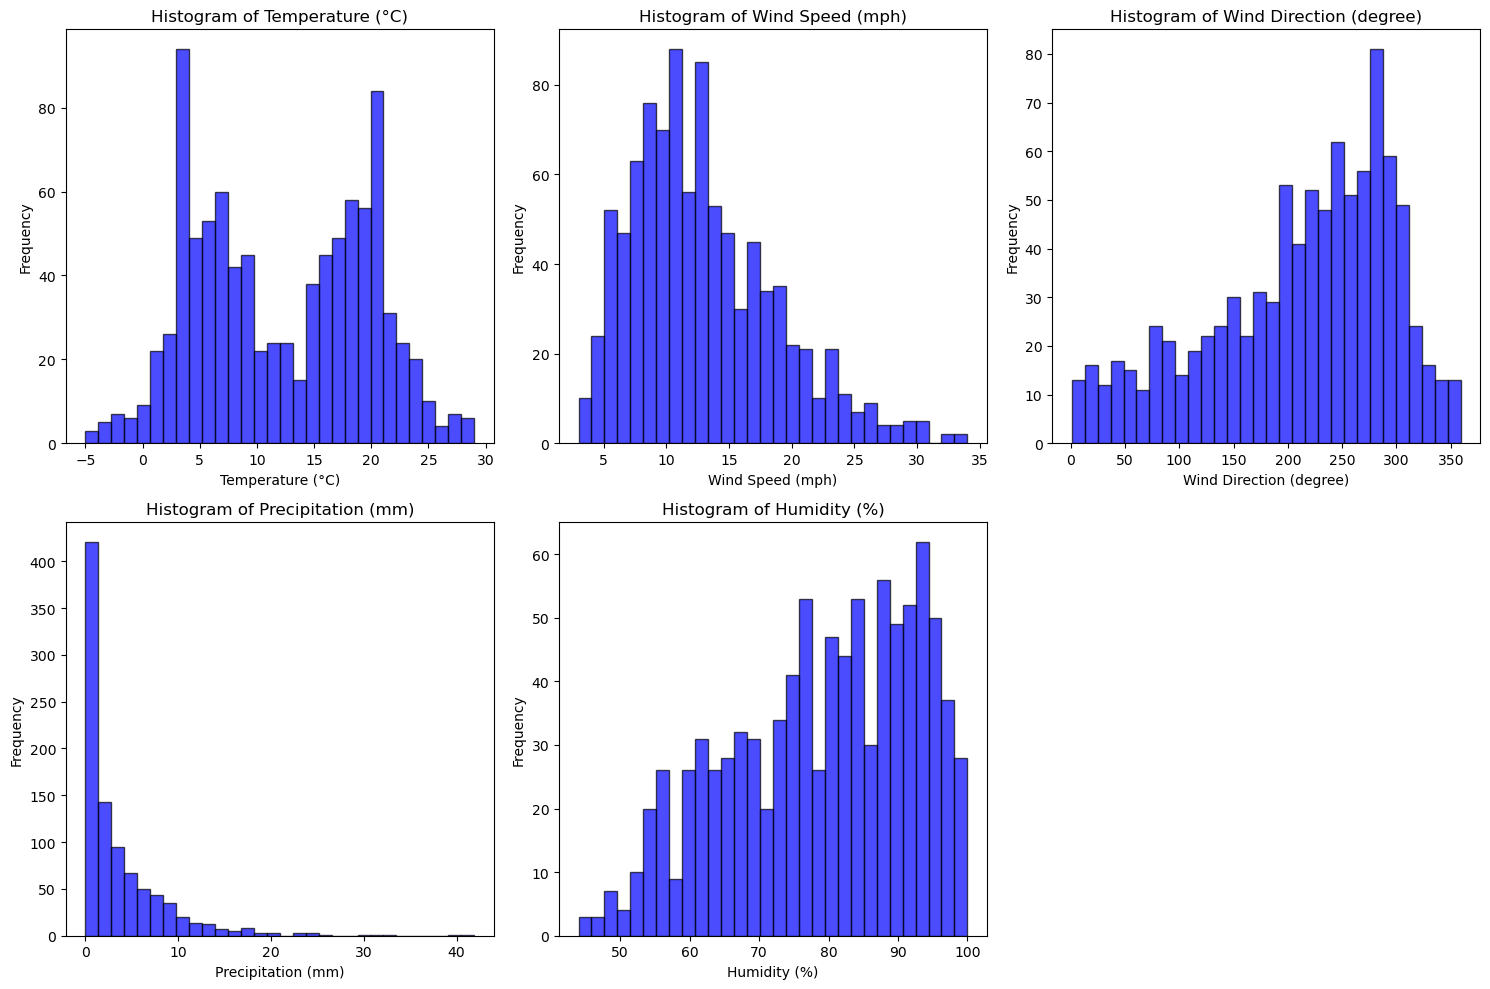

In [223]:
# Define the columns to plot
columns = ['Temperature (°C)', 'Wind Speed (mph)', 'Wind Direction (degree)', 'Precipitation (mm)', 'Humidity (%)']
# Create histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

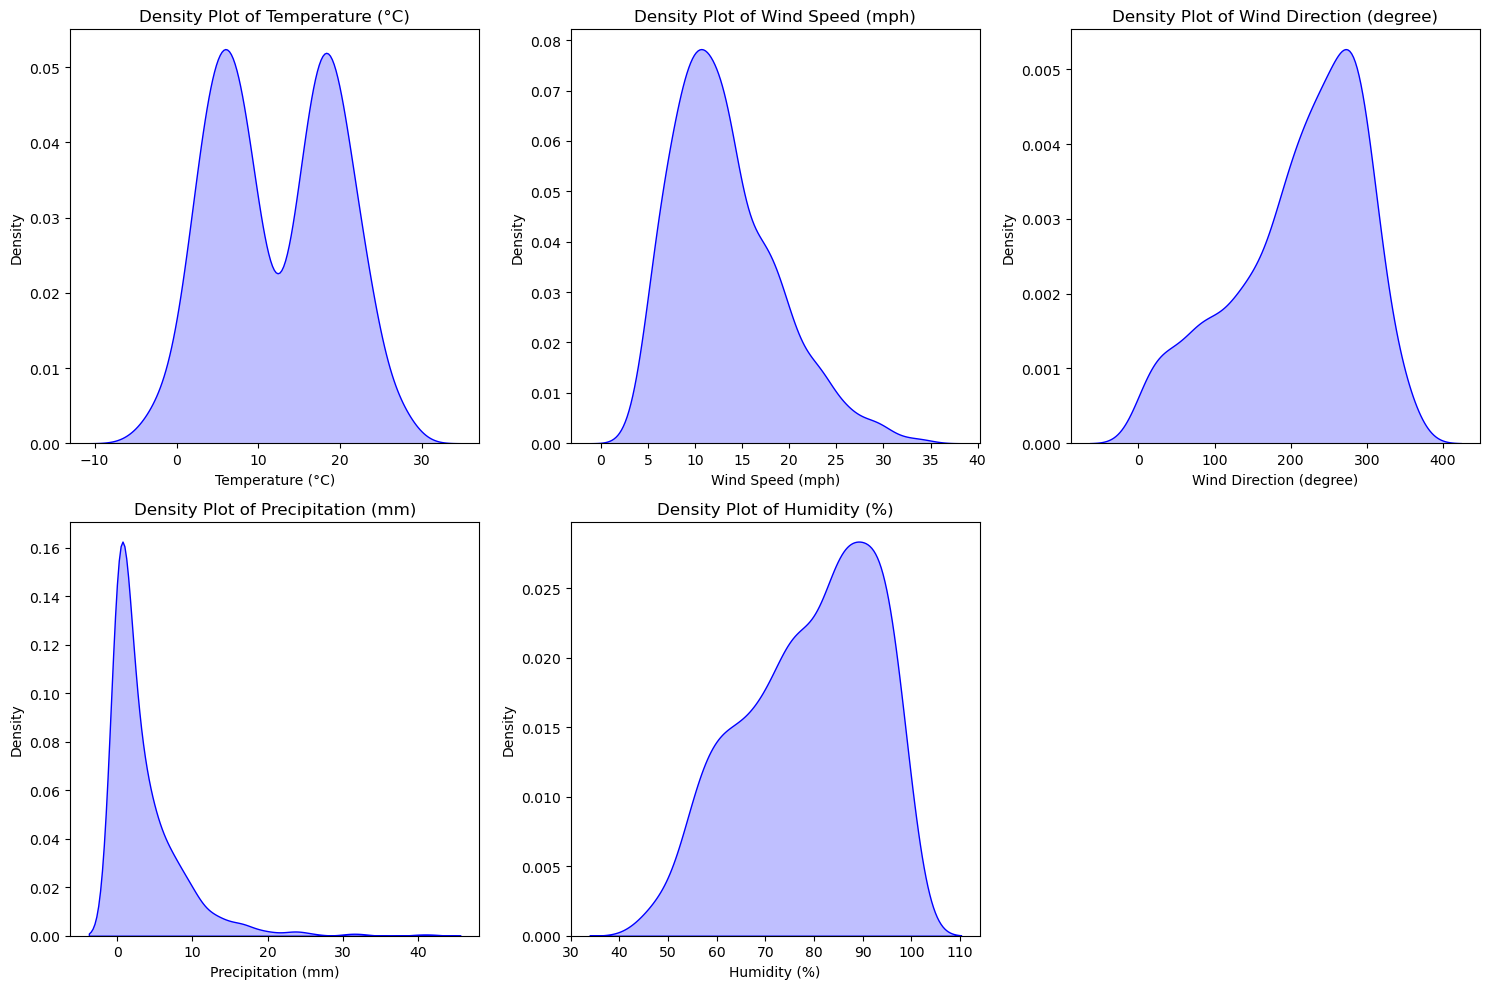

In [224]:
import seaborn as sns
#density plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

Histograms
Temperature (°C):

The histogram shows a bimodal distribution with two peaks around 0-5°C and 15-20°C. This indicates that the dataset includes data from two distinct temperature regimes, likely representing different seasons (e.g., winter and summer).
Wind Speed (mph):

The wind speed distribution is slightly right-skewed, with most observations falling between 5 and 15 mph. There are a few instances of higher wind speeds, but these are less frequent.
Wind Direction (degree):

The wind direction histogram shows a relatively uniform distribution with a slight peak around 250-300 degrees. This suggests that while wind comes from various directions, there is a predominant direction range in this dataset.
Precipitation (mm):

The precipitation histogram is heavily right-skewed, indicating that most days have little to no precipitation. There are occasional days with higher precipitation, but these are rare.
Humidity (%):

The humidity distribution shows a left-skewed pattern with a concentration of values around 70-90%. This indicates that the majority of observations have high humidity levels.
Density Plots
Temperature (°C):

The density plot confirms the bimodal distribution observed in the histogram, with two distinct peaks.
Wind Speed (mph):

The density plot for wind speed shows a smooth right-skewed distribution, with the majority of values falling between 5 and 15 mph.
Wind Direction (degree):

The density plot of wind direction also shows a somewhat uniform distribution with a peak around 250-300 degrees.
Precipitation (mm):

The density plot for precipitation confirms the heavy right-skewness, indicating that most days have low or no precipitation.
Humidity (%):

The density plot for humidity shows a left-skewed distribution with a peak around 80-90%, confirming that high humidity levels are common.
Summary
Temperature (°C): The bimodal distribution suggests the data is collected over different seasons, likely winter and summer.
Wind Speed (mph): The right-skewed distribution indicates that moderate wind speeds are more common, with few instances of high wind speeds.
Wind Direction (degree): The relatively uniform distribution with a slight peak suggests that while wind direction varies, there is a predominant direction range.
Precipitation (mm): The heavily right-skewed distribution shows that most days have little to no precipitation, with occasional heavy precipitation days.
Humidity (%): The left-skewed distribution indicates that high humidity levels are prevalent in the dataset.

**For future references:**

The histograms and density plots provide several valuable insights that can inform my pre-processing, clustering, and classification steps:

1. Pre-processing
Handling Skewness:

Precipitation (mm) and Humidity (%) show skewed distributions. Applying transformations such as logarithmic or Box-Cox transformations can help normalize these distributions.
For example, log transformation can be applied to the precipitation data to reduce skewness.
Bimodal Distributions:

The Temperature (°C) feature shows a bimodal distribution, suggesting seasonal variations. This could be further explored by creating a new feature representing the season, which might improve clustering and classification.
Outlier Detection:

The histograms and density plots indicate potential outliers in features like Wind Speed (mph) and Precipitation (mm). Identifying and handling these outliers is crucial to prevent them from skewing the results of clustering and classification algorithms.
Techniques such as IQR or Z-score can be applied to detect and potentially remove or transform these outliers.
2. Clustering
Feature Selection:

The insights from the distribution plots can guide the selection of features for clustering. For example, knowing that Temperature (°C) has distinct seasonal peaks might suggest it as an important feature for clustering different seasonal patterns.
Combining Temperature (°C) with other features like Humidity (%) and Precipitation (mm) can help form meaningful clusters representing different weather conditions.
Normalization:

Given the different scales of features (e.g., Wind Direction (degree) vs. Humidity (%)), normalization or standardization is crucial before applying clustering algorithms. This ensures that all features contribute equally to the distance calculations in algorithms like K-Means.
3. Classification
Creating Labels:

The bimodal distribution in Temperature (°C) suggests clear seasonal distinctions. I can create labels such as "cold season" and "warm season" based on temperature thresholds.
Similarly, combinations of Temperature (°C), Humidity (%), and Precipitation (mm) can be used to create labels like "cold and dry", "warm and humid", etc.
Balancing Classes:

If labels are created based on combinations of features, ensure that the resulting classes are balanced. The density plots can help identify whether certain conditions (e.g., high precipitation) are rare, and I may need to address class imbalance during classification.
Handling Skewed Features:

For classification algorithms that are sensitive to feature distributions (like logistic regression), it’s beneficial to transform skewed features to approximate normal distributions. This can improve model performance and stability.



***Outlier Detection and Standardization/Normalization***

In my case, where I have skewed distributions and suspect some outliers might be errors, I think about the following approach:

Outlier Detection (Unscaled Data): Use IQR to identify outliers in the unscaled data for each feature.
Handle Outliers: Remove, cap, or winsorize the identified outliers.
Standardization (Outlier-Handled Data): Apply standardization to the data after handling the outliers. This prepares the data for LOF.
Outlier Detection (Multivariate): Use LOF on the standardized data to identify multivariate outliers.


In [225]:
#Outlier Detection (Unscaled Data) Using IQR
# Define the column names
column_names = ['Temperature (°C)', 'Wind Speed (mph)', 'Wind Direction (degree)', 'Precipitation (mm)', 'Humidity (%)']
data.columns = column_names
# Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#identify outliers using the IQR method
multiplier = 1.5
outliers_iqr = ((data < (Q1 - multiplier * IQR)) | (data > (Q3 + multiplier * IQR))).any(axis=1)
outliers_data_iqr = data[outliers_iqr]
print(f'Total number of outliers (IQR method): {outliers_data_iqr.shape[0]}')
print(outliers_data_iqr.head())

Total number of outliers (IQR method): 61
     Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
4                   1                17                       19   
15                  6                28                      161   
21                  7                22                      311   
56                  4                19                      279   
102                18                13                      141   

     Precipitation (mm)  Humidity (%)  
4                  17.0            97  
15                 17.4            98  
21                 14.7            95  
56                 18.8            99  
102                14.0            88  


Handle Outliers
I can choose to remove, cap, or winsorize the outliers. Here’s an example of removing them:

In [226]:
# Remove outliers identified by IQR method
data_cleaned = data[~outliers_iqr]
# Verify the cleaned data
print(f'Original dataset shape: {data.shape}')
print(f'Cleaned dataset shape: {data_cleaned.shape}')

Original dataset shape: (938, 5)
Cleaned dataset shape: (877, 5)


Step 3: Standardization (Outlier-Handled Data)

In [227]:
from sklearn.preprocessing import StandardScaler
# Standardize the cleaned data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_cleaned)
# Convert back to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data, columns=column_names)
# Verifying the standardization
print(standardized_df.head())

   Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
0         -1.484288         -0.526745                 1.033938   
1         -1.219496          0.631522                 0.696501   
2         -1.484288          0.052388                -2.189169   
3         -1.616685         -0.526745                 0.964123   
4         -1.616685          1.017611                -1.933182   

   Precipitation (mm)  Humidity (%)  
0           -0.720757      0.502364  
1            0.079332      0.803508  
2           -0.820768      0.728222  
3           -0.887442      0.502364  
4           -0.187364      1.029366  


In [228]:
from sklearn.neighbors import LocalOutlierFactor
# Initialize the Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
# Fit the model and predict outliers
outlier_labels = lof.fit_predict(standardized_df)
# -1 indicates outlier, 1 indicates inlier
outliers_lof = standardized_df[outlier_labels == -1]
print(f'Total number of outliers (LOF method): {outliers_lof.shape[0]}')
print(outliers_lof.head())

Total number of outliers (LOF method): 44
    Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
26         -1.219496          0.438477                 1.359739   
43         -0.954703         -0.719790                 0.289249   
48         -1.351892         -0.333701                 1.196839   
73          0.236864         -0.140656                -2.433520   
86          1.428431         -0.140656                 0.149620   

    Precipitation (mm)  Humidity (%)  
26           -0.887442     -1.153926  
43            0.746073      0.201220  
48            2.246240      1.330509  
73           -0.787431     -1.831500  
86            2.812969     -1.982072  


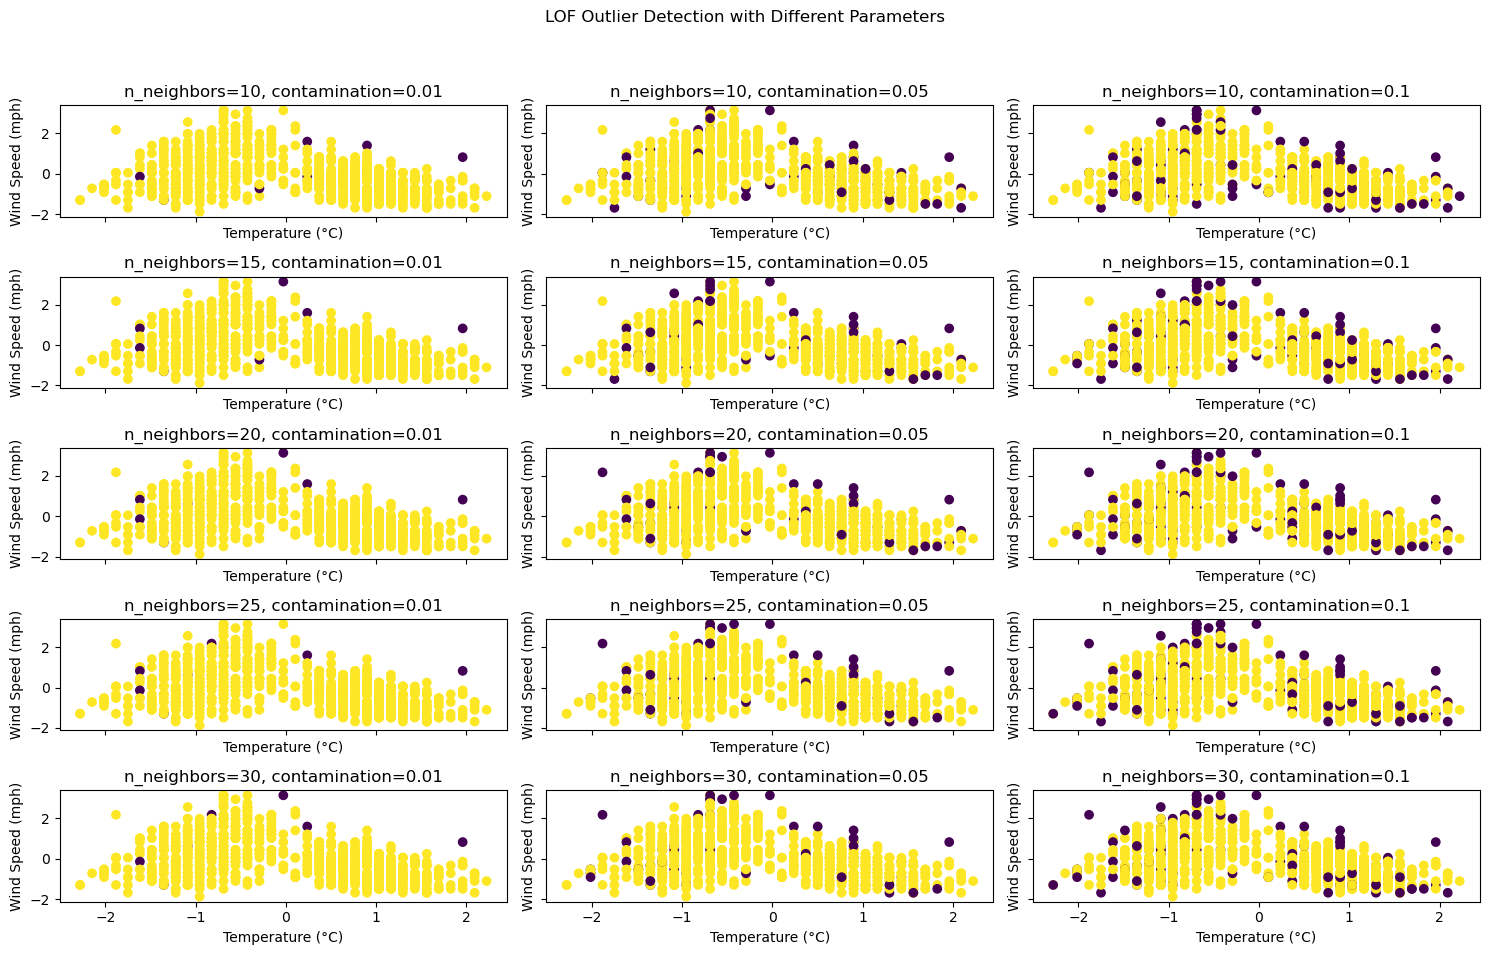

In [229]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'n_neighbors': [10, 15, 20, 25, 30],
    'contamination': [0.01, 0.05, 0.10]  # Adjust based on my expectations
}
grid = ParameterGrid(param_grid)
fig, axes = plt.subplots(len(param_grid['n_neighbors']), len(param_grid['contamination']), figsize=(15, 10), sharex=True, sharey=True)

for i, n_neighbors in enumerate(param_grid['n_neighbors']):
    for j, contamination in enumerate(param_grid['contamination']):
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        outlier_labels = lof.fit_predict(standardized_df)
        
        # Plotting
        axes[i, j].scatter(standardized_df.iloc[:, 0], standardized_df.iloc[:, 1], c=outlier_labels, cmap='viridis', marker='o')
        axes[i, j].set_title(f"n_neighbors={n_neighbors}, contamination={contamination}")
        axes[i, j].set_xlabel(column_names[0])
        axes[i, j].set_ylabel(column_names[1])

plt.suptitle('LOF Outlier Detection with Different Parameters')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


n_neighbors = 20
contamination = 0.05
Reasoning:

Outlier Distribution:  With n_neighbors=20 and contamination=0.05, the outliers are predominantly located at the edges of the data distribution, suggesting extreme values of either temperature or wind speed. This aligns with the expectation that outliers in weather data would typically represent unusual or extreme weather events.

Density Considerations:  Increasing the number of neighbors to 30 seems to reduce the number of outliers identified, which might be too conservative if I am interested in capturing more subtle outliers within denser regions.

Contamination Estimate: The contamination value of 0.05 seems reasonable if I expect a relatively small proportion of outliers in weather data.

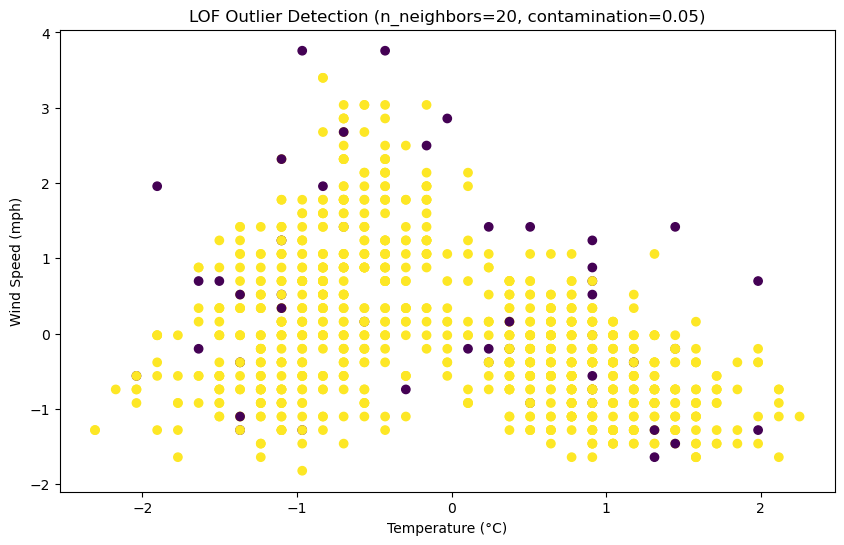

Total number of outliers detected (LOF method): 47
    Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
4          -1.501958          0.698314                -2.250413   
6          -2.038045         -0.561337                 1.544710   
28         -1.099893          1.238165                 1.509461   
51         -1.367936         -0.381387                 1.215721   
77          0.240325         -0.201437                -2.450156   

    Precipitation (mm)  Humidity (%)  
4             2.717888      1.340166  
6            -0.686472      1.340166  
28            1.117029      0.292291  
51            1.177821      1.265318  
77           -0.666208     -1.878307  


In [230]:
# Define the column names
column_names = ['Temperature (°C)', 'Wind Speed (mph)', 'Wind Direction (degree)', 'Precipitation (mm)', 'Humidity (%)']
data.columns = column_names
# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
# Convert back to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data, columns=column_names)
# Set chosen parameters for LOF
n_neighbors = 20
contamination = 0.05
# Apply LOF with chosen parameters
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
outlier_labels = lof.fit_predict(standardized_df)
# Identify outliers
outliers_lof = standardized_df[outlier_labels == -1]
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(standardized_df.iloc[:, 0], standardized_df.iloc[:, 1], c=outlier_labels, cmap='viridis', marker='o')
plt.title(f'LOF Outlier Detection (n_neighbors={n_neighbors}, contamination={contamination})')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Print the number of outliers detected
print(f'Total number of outliers detected (LOF method): {outliers_lof.shape[0]}')
print(outliers_lof.head())

In [231]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Convert back to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data, columns=column_names)

# Set chosen parameters for LOF
n_neighbors = 20
contamination = 0.05

# Apply LOF with chosen parameters
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
outlier_labels = lof.fit_predict(standardized_df)

# Identify outliers
outliers_lof = standardized_df[outlier_labels == -1]

# Remove outliers from the dataset
data_cleaned = data[outlier_labels != -1]

# Calculate the 95th percentile for each feature
percentile_95 = data_cleaned.quantile(0.95)

# Cap outliers at the 95th percentile
data_capped = data_cleaned.clip(upper=percentile_95, axis=1)

# Verify the capping
print(f'95th Percentile Thresholds:\n{percentile_95}')
print(f'First few rows of capped data:\n{data_capped.head()}')

95th Percentile Thresholds:
Temperature (°C)            23.5
Wind Speed (mph)            23.0
Wind Direction (degree)    316.5
Precipitation (mm)          11.3
Humidity (%)                97.0
Name: 0.95, dtype: float64
First few rows of capped data:
   Temperature (°C)  Wind Speed (mph)  Wind Direction (degree)  \
0               1.0                10                    300.0   
1               3.0                16                    271.0   
2               1.0                13                     23.0   
3               0.0                10                    294.0   
5               0.0                18                     45.0   

   Precipitation (mm)  Humidity (%)  
0                 0.5            85  
1                 2.9            89  
2                 0.2            88  
3                 0.0            85  
5                 2.1            92  


The table showing the 95th percentile thresholds and the initial rows of the capped data looks promising. Capping at the 95th percentile seems to effectively address the extreme values in my dataset while preserving the overall distribution.

Interpretation:

Temperature (°C): Values exceeding 23.5°C have been capped, indicating the removal of unusually hot days.
Wind Speed (mph): Values above 23 mph are now capped, representing the mitigation of extremely windy conditions.
Wind Direction (degree): Values above 316.5 degrees are capped, suggesting the removal or reduction of some extreme wind direction values. However, since wind direction is cyclical, further analysis might be needed to interpret this properly.
Precipitation (mm): Values above 11.3mm are capped, addressing days with exceptionally heavy rainfall.
Humidity (%): Values above 97% are capped, handling extremely humid days.
Observations:

The first few rows of the capped data seem to align with typical weather conditions, suggesting that the capping hasn't distorted the data in a significant way.
The wind direction values still show a wide range even after capping. This is expected due to the cyclical nature of wind direction. You might consider using circular statistics or other specialized techniques for dealing with wind direction data.

In [232]:
#Data Transformation: Standardization and Handling Cyclical Data
#To proceed with the data transformation, we will standardize all features except for
# wind direction. For wind direction, we'll use a trigonometric transformation to convert
# it into two features: sin_wind_direction and cos_wind_direction.
# Separate the wind direction column
wind_direction = data_capped['Wind Direction (degree)']
other_features = data_capped.drop(columns=['Wind Direction (degree)'])

# Standardize the other features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(other_features)

# Convert back to DataFrame for better readability
standardized_df = pd.DataFrame(standardized_data, columns=other_features.columns)

# Add the wind direction back to the DataFrame
standardized_df['Wind Direction (degree)'] = wind_direction.values

# Verify the transformation
print(standardized_df.head())

   Temperature (°C)  Wind Speed (mph)  Precipitation (mm)  Humidity (%)  \
0         -1.534802         -0.566034           -0.741253      0.443674   
1         -1.259136          0.635720           -0.028306      0.752815   
2         -1.534802          0.034843           -0.830371      0.675530   
3         -1.672635         -0.566034           -0.889784      0.443674   
4         -1.672635          1.036305           -0.265955      0.984671   

   Wind Direction (degree)  
0                    300.0  
1                    271.0  
2                     23.0  
3                    294.0  
4                     45.0  


In [233]:
# Convert wind direction into sine and cosine components
standardized_df['sin_wind_direction'] = np.sin(np.radians(standardized_df['Wind Direction (degree)']))
standardized_df['cos_wind_direction'] = np.cos(np.radians(standardized_df['Wind Direction (degree)']))

# Drop the original wind direction column
standardized_df.drop(columns=['Wind Direction (degree)'], inplace=True)

# Verify the transformation
print(standardized_df.head())

#preserving the cyclical nature of wind direction while standardizing
# the other features for better performance in machine learning algorithms.

   Temperature (°C)  Wind Speed (mph)  Precipitation (mm)  Humidity (%)  \
0         -1.534802         -0.566034           -0.741253      0.443674   
1         -1.259136          0.635720           -0.028306      0.752815   
2         -1.534802          0.034843           -0.830371      0.675530   
3         -1.672635         -0.566034           -0.889784      0.443674   
4         -1.672635          1.036305           -0.265955      0.984671   

   sin_wind_direction  cos_wind_direction  
0           -0.866025            0.500000  
1           -0.999848            0.017452  
2            0.390731            0.920505  
3           -0.913545            0.406737  
4            0.707107            0.707107  


By this, we are preserving the cyclical nature of wind direction while standardizing the other features for better performance in machine learning algorithms.

Problem with Raw Wind Direction:

Circular Nature: Wind direction is measured in degrees, ranging from 0 to 360 (or -180 to 180). However, 0 degrees and 360 degrees represent the same direction (North). This circularity can cause problems for many machine learning algorithms that assume a linear relationship between feature values.
Discontinuity: There's a discontinuity when the direction goes from 359 degrees back to 0 degrees. A small change in angle (from 359 to 0) results in a large difference in numerical value, which doesn't reflect the actual similarity in wind direction.
Solution: Trigonometric Transformation

By converting wind direction into sine and cosine components, we achieve the following:

Continuity: The sine and cosine functions are continuous and smooth, eliminating the discontinuity issue. A small change in wind direction results in a small change in the sine and cosine values, accurately reflecting the actual change in direction.
Representation of Circularity: The sine and cosine values together represent a point on the unit circle, where the angle corresponds to the wind direction. This captures the cyclical nature of wind direction.
Suitable for Algorithms: The transformed features are now suitable for a wider range of machine learning algorithms, as they represent the wind direction in a way that's consistent with the assumptions of many algorithms.
How it Works:

Conversion:

Convert wind direction from degrees to radians.
Calculate the sine and cosine of the radian value.
Interpretation:

sin_wind_direction represents the north-south component of the wind direction.
cos_wind_direction represents the east-west component of the wind direction.
Example:

Wind direction of 0 degrees (North):
sin_wind_direction = 0
cos_wind_direction = 1
Wind direction of 90 degrees (East):
sin_wind_direction = 1
cos_wind_direction = 0
Wind direction of 180 degrees (South):
sin_wind_direction = 0
cos_wind_direction = -1

In [234]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = standardized_df.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = standardized_df.columns
vif_data['VIF'] = [variance_inflation_factor(standardized_df.values, i) for i in range(standardized_df.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Correlation Matrix:
                    Temperature (°C)  Wind Speed (mph)  Precipitation (mm)  \
Temperature (°C)            1.000000         -0.378689            0.016850   
Wind Speed (mph)           -0.378689          1.000000            0.374762   
Precipitation (mm)          0.016850          0.374762            1.000000   
Humidity (%)               -0.590574          0.435483            0.439635   
sin_wind_direction         -0.130861         -0.182968            0.004999   
cos_wind_direction          0.028103         -0.253228           -0.310422   

                    Humidity (%)  sin_wind_direction  cos_wind_direction  
Temperature (°C)       -0.590574           -0.130861            0.028103  
Wind Speed (mph)        0.435483           -0.182968           -0.253228  
Precipitation (mm)      0.439635            0.004999           -0.310422  
Humidity (%)            1.000000            0.049652           -0.253862  
sin_wind_direction      0.049652            1.000000      

 Before applying PCA, it's a good practice to check for multicollinearity and linearity among features. This helps in understanding whether PCA will be effective and whether the features have linear relationships.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

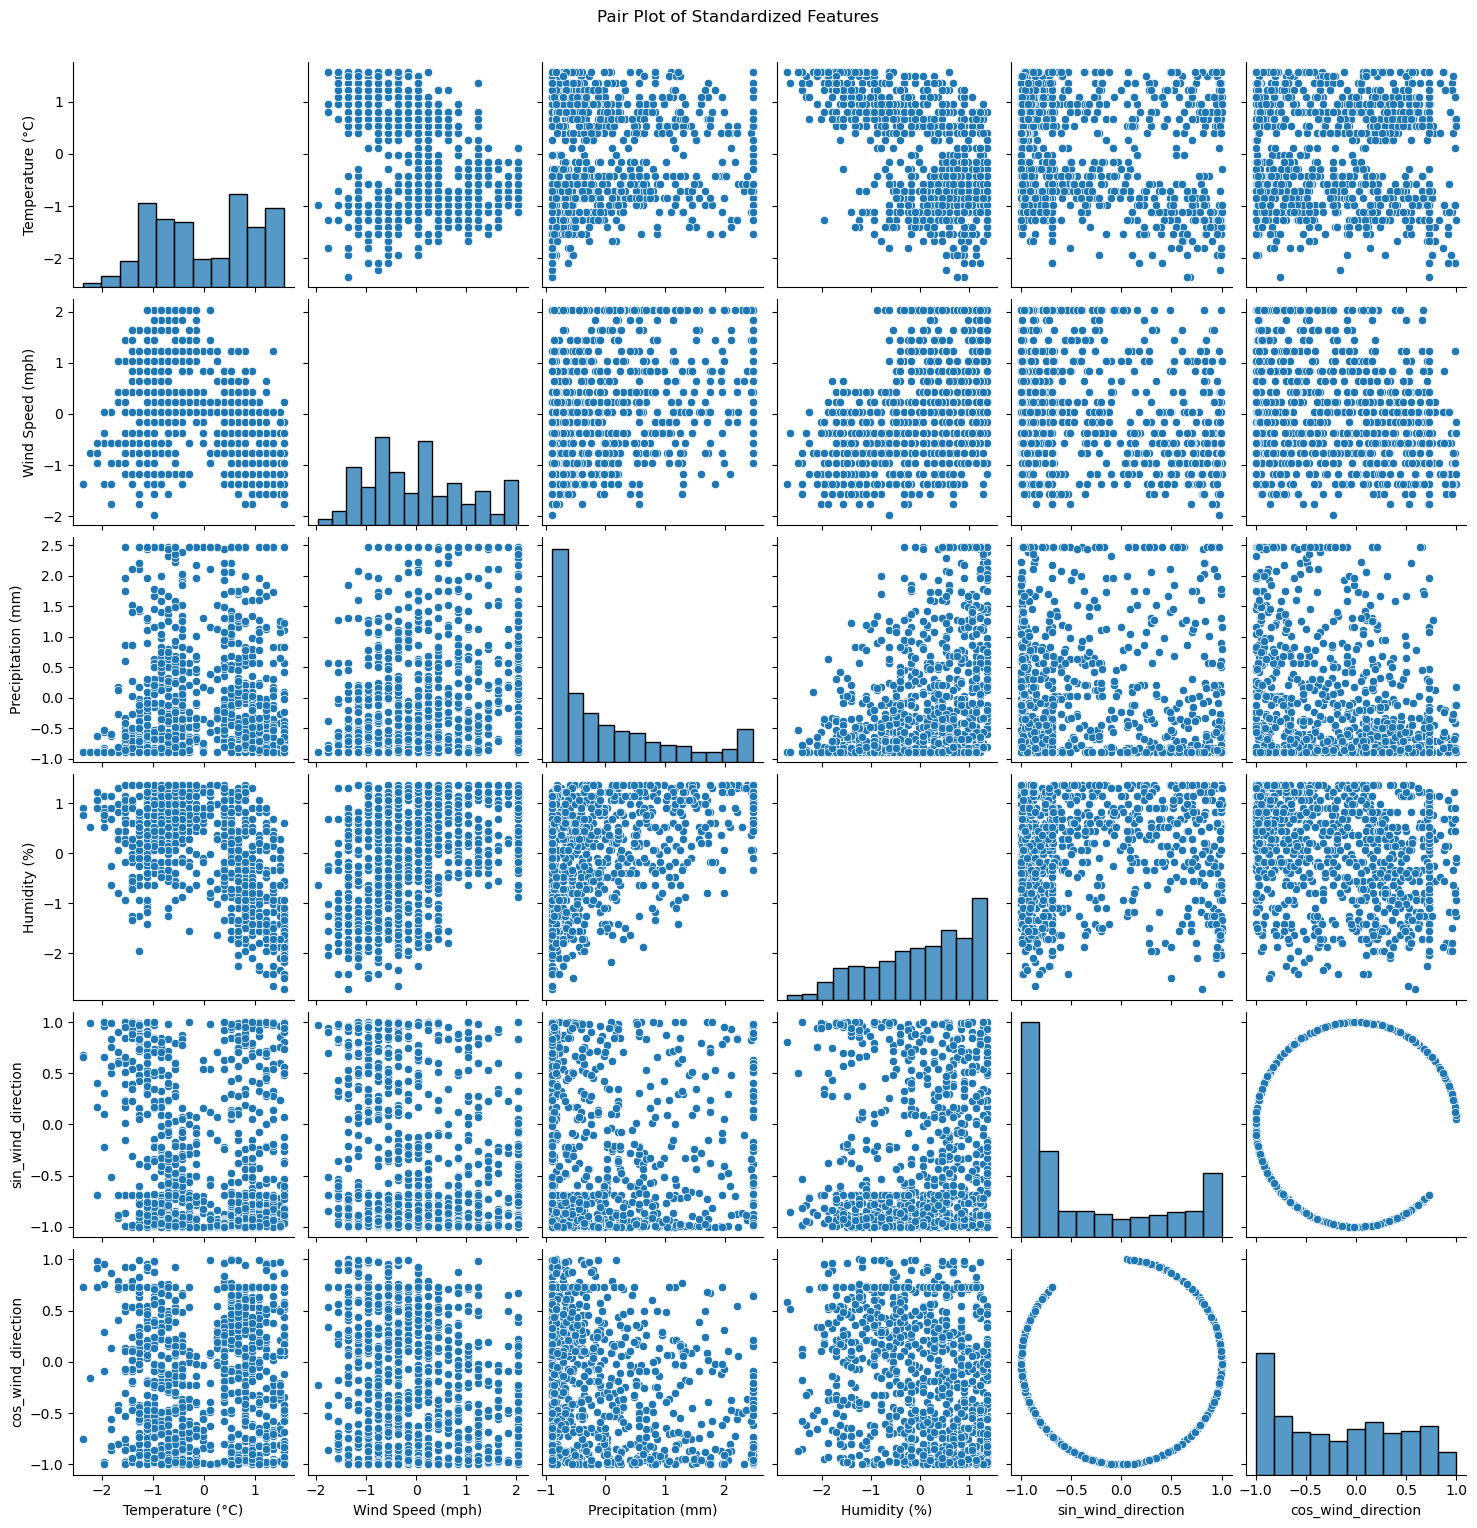

In [235]:
# Visualize relationships between pairs of features using scatter plots
sns.pairplot(standardized_df)
plt.suptitle('Pair Plot of Standardized Features', y=1.02)
plt.show()


Considering analysis of the correlation matrix, VIF values, and scatterplots, along with the potential drawbacks of PCA in this context, I recommend not performing dimensionality reduction at this stage.

Reasoning:

Low Multicollinearity: analysis already indicates that multicollinearity is not a significant issue in data. This is supported by the low VIF values and the absence of extremely high correlations in the correlation matrix. Therefore, dimensionality reduction to address multicollinearity is not necessary.

Nonlinear Relationships: The scatterplots reveal nonlinear relationships between some features, particularly with the wind direction components. PCA, as a linear technique, might not effectively capture these relationships and could even distort the information contained in the data.

Interpretability: Using the original features directly in clustering and classification models will make the results more interpretable. I'll be able to directly assess the impact of each weather variable on the outcomes, which is valuable for understanding the underlying weather patterns.

Potential Alternatives: If dimensionality reduction becomes necessary in the future due to performance issues or other reasons, consider using nonlinear techniques like t-SNE or UMAP that are better suited for handling nonlinear relationships.

Explained variance by each component: [0.50813996 0.33894962]


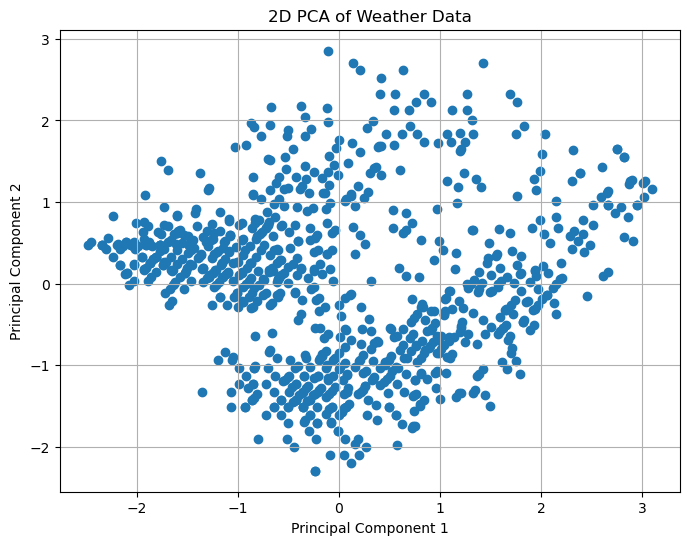

In [236]:
from sklearn.decomposition import PCA
# Select the three features from the standardized data
features = ['Temperature (°C)', 'Wind Speed (mph)', 'Precipitation (mm)']
standardized_features = standardized_df[features]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Adding the PCA components back to the standardized dataframe
data_with_pca = pd.concat([standardized_df, pca_df], axis=1)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Visualizing the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Weather Data')
plt.grid(True)
plt.show()


PC1 (Principal Component 1): Explains 50.8% of the total variance in the original three features. This indicates that PC1 captures the most dominant pattern of variation in weather data. It's likely a combination of all three features, but the exact relationship would need further analysis (e.g., looking at the component loadings).

PC2 (Principal Component 2): Explains 33.9% of the total variance. This component captures a secondary pattern of variation, orthogonal (independent) to PC1. It also represents a combination of the original features.

Total Explained Variance: Together, PC1 and PC2 explain 84.7% of the total variance in original data. This suggests that I've successfully reduced the dimensionality from three features to two while retaining a significant amount of information.

Scatter Plot Interpretation:

The 2D scatter plot visualizes weather data points in the new PCA space. Here's what I can observe:

Two Distinct Clusters: The plot reveals two main clusters of data points, suggesting two dominant weather patterns in dataset.
Cluster Interpretation: To interpret these clusters, I'll need to relate them back to the original features (Temperature, Wind Speed, and Precipitation). For example:
Cluster 1 (Right): Might represent days with higher temperatures, perhaps combined with moderate wind speeds and precipitation.
Cluster 2 (Left): Could represent days with lower temperatures, possibly combined with varying wind speeds and precipitation levels.

In [237]:
# Calculate loadings
loadings = pca.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=features, index=['Principal Component 1', 'Principal Component 2'])
print(loadings_df)


                       Temperature (°C)  Wind Speed (mph)  Precipitation (mm)
Principal Component 1         -0.498781          0.712675            0.493267
Principal Component 2          0.703404          0.000330            0.710790


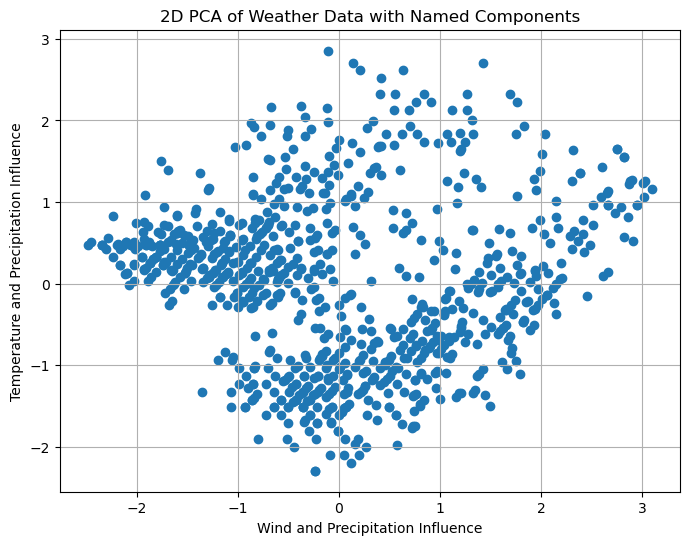

In [238]:
# Rename the principal components based on interpretation
pca_df.rename(columns={'Principal Component 1': 'Wind and Precipitation Influence', 
                       'Principal Component 2': 'Temperature and Precipitation Influence'}, inplace=True)

# Visualize with new names
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Wind and Precipitation Influence'], pca_df['Temperature and Precipitation Influence'])
plt.xlabel('Wind and Precipitation Influence')
plt.ylabel('Temperature and Precipitation Influence')
plt.title('2D PCA of Weather Data with Named Components')
plt.grid(True)
plt.show()

In [239]:
# Ensure the correct names for principal components
pca_df.rename(columns={'Principal Component 1': 'Wind and Precipitation Influence', 
                       'Principal Component 2': 'Temperature and Precipitation Influence'}, inplace=True)

# Merge the PCA components with the original standardized data
data_with_pca = pd.concat([standardized_df, pca_df], axis=1)

# Drop the original PCA column names if they still exist
data_with_pca = data_with_pca.drop(columns=['Principal Component 1', 'Principal Component 2'], errors='ignore')

# Remove the original features (Temperature, Wind Speed, and Precipitation)
data_with_pca = data_with_pca.drop(columns=['Temperature (°C)', 'Wind Speed (mph)', 'Precipitation (mm)'])

# Show the first few rows to verify
print(data_with_pca.head())


   Humidity (%)  sin_wind_direction  cos_wind_direction  \
0      0.443674           -0.866025            0.500000   
1      0.752815           -0.999848            0.017452   
2      0.675530            0.390731            0.920505   
3      0.443674           -0.913545            0.406737   
4      0.984671            0.707107            0.707107   

   Wind and Precipitation Influence  Temperature and Precipitation Influence  
0                         -0.003504                                -1.606648  
1                          1.067132                                -0.905591  
2                          0.380767                                -1.669794  
3                         -0.008021                                -1.809175  
4                          1.441639                                -1.365234  


***Clustering***

K-Means Clustering:

Reasoning:
Simplicity and Efficiency: K-Means is a straightforward and computationally efficient algorithm, suitable for handling moderately sized datasets like this.
Interpretability: The results of K-Means (cluster assignments and centroids) are easy to interpret and understand in the context of weather patterns. I can easily examine the mean values of temperature, wind speed, etc. for each cluster to get a sense of the typical weather conditions represented by that cluster.
Potential for Seasonal Clusters: Since dataset is time-series based and I've created a "Season" feature, K-Means might be able to identify clusters corresponding to different seasons or distinct weather patterns within each season.
Hierarchical Clustering (Agglomerative):

Reasoning:
Hierarchical Structure: Hierarchical clustering can reveal hierarchical relationships between weather patterns. This could be useful for understanding how different types of weather conditions are related to each other. For example, I might find that "warm and humid" days are more closely related to "mild and humid" days than to "cold and dry" days.
Flexibility: I can choose different linkage methods (ward, complete, average, single) and distance metrics to explore different ways of grouping data.
Dendrogram: The dendrogram produced by hierarchical clustering provides a visual representation of the clustering process, allowing me to identify natural groupings and choose the number of clusters that best suits my needs.
Why Not Other Algorithms:

DBSCAN: DBSCAN is a density-based algorithm that might not be the best fit for data if I expect clusters of varying densities or shapes. Weather patterns can be diverse and might not always form dense clusters.
Gaussian Mixture Models: While powerful, GMMs require more assumptions about the data distribution and might be overkill for current exploration of weather patterns.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

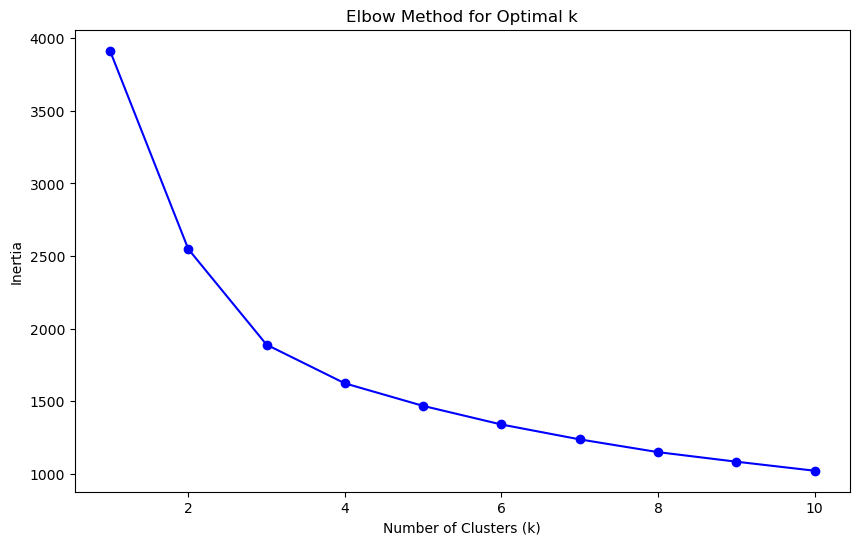

In [240]:
from sklearn.cluster import KMeans

# Calculate inertia for different values of k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_with_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia to visualize the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

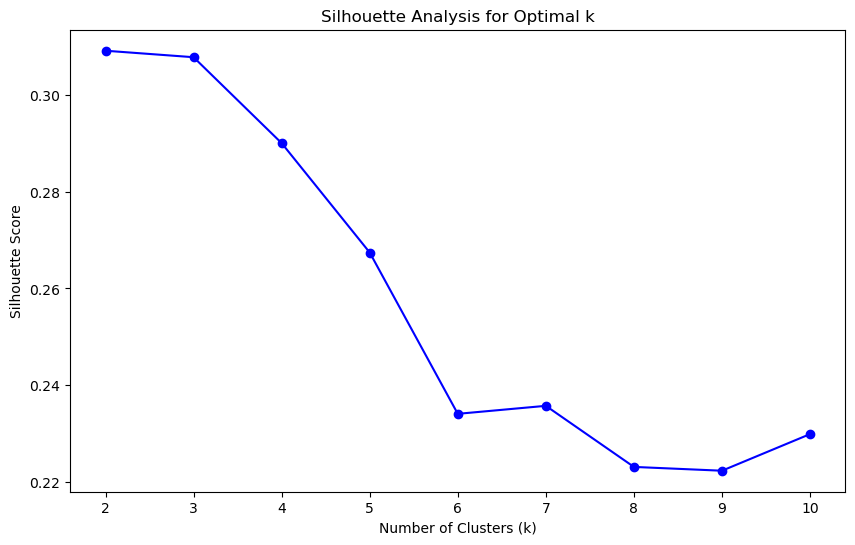

In [241]:
from sklearn.metrics import silhouette_score

import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '4'

# Calculate silhouette scores for different values of k
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_with_pca)
    silhouette_scores.append(silhouette_score(data_with_pca, cluster_labels))

# Plot the silhouette scores to visualize the Silhouette Analysis
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()



In [242]:
#The silhouette score is highest for 𝑘 = 2 k=2 and 𝑘 = 3 k=3.
#The score starts to decrease significantly after 𝑘 = 4 k=4. 
#Given this information, 𝑘 = 2 k=2 and 𝑘 = 3 k=3 are both strong candidates, 
#but 𝑘 = 3 k=3 offers slightly more detailed clustering while still maintaining a high silhouette score.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


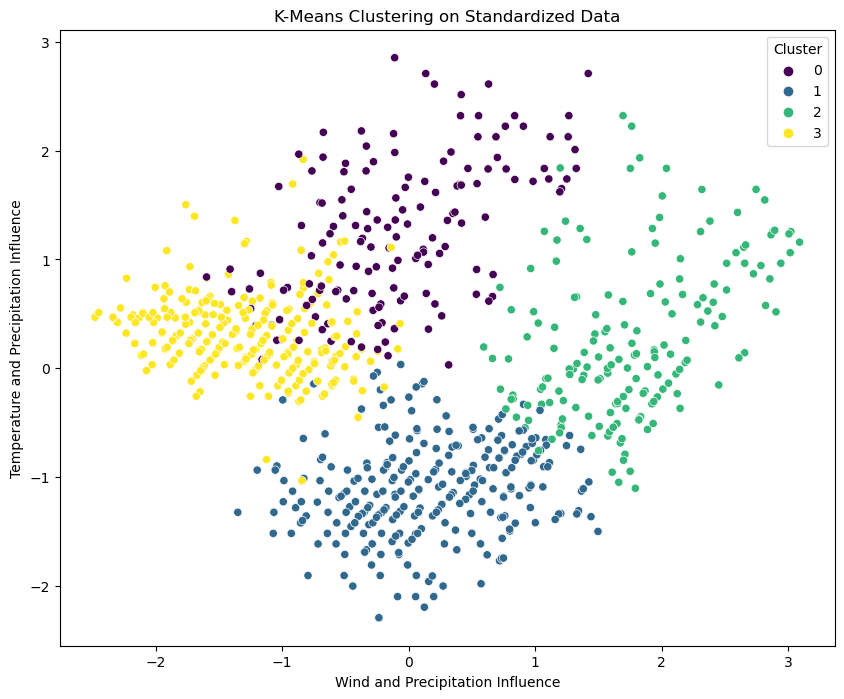

Cluster Centers:
    Humidity (%)  sin_wind_direction  cos_wind_direction  \
0      0.334773           -0.257416           -0.368056   
1      0.378958           -0.219409           -0.087393   
2      0.824610           -0.464397           -0.508138   
3     -1.177274           -0.438461            0.061777   

   Wind and Precipitation Influence  Temperature and Precipitation Influence  
0                         -0.109825                                 1.229937  
1                          0.120328                                -1.135515  
2                          1.786533                                 0.290102  
3                         -1.301122                                 0.323263  
Cluster Means:
          Humidity (%)  sin_wind_direction  cos_wind_direction  \
Cluster                                                         
0            0.334773           -0.257416           -0.368056   
1            0.378958           -0.219409           -0.087393   
2            0.

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Apply K-Means clustering to the entire dataset (all features)
kmeans = KMeans(n_clusters=4, random_state=42)
data_with_pca['Cluster'] = kmeans.fit_predict(data_with_pca.drop(columns=['Cluster'], errors='ignore'))

# Visualize the clusters with respect to the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Wind and Precipitation Influence',
    y='Temperature and Precipitation Influence',
    hue='Cluster',
    palette='viridis',
    data=data_with_pca,
    legend='full'
)
plt.title('K-Means Clustering on Standardized Data')
plt.show()

# Get the indices of the columns used for PCA and any other relevant columns
pca_columns_idx = [data_with_pca.columns.get_loc(col) for col in [
    'Humidity (%)', 'sin_wind_direction', 'cos_wind_direction', 
    'Wind and Precipitation Influence', 'Temperature and Precipitation Influence'
]]

# Filter cluster centers to include only the selected columns
cluster_centers = pd.DataFrame(kmeans.cluster_centers_[:, pca_columns_idx], columns=[
    'Humidity (%)', 'sin_wind_direction', 'cos_wind_direction', 
    'Wind and Precipitation Influence', 'Temperature and Precipitation Influence'
])
print("Cluster Centers:\n", cluster_centers)

# Calculate and interpret the mean values for each cluster
cluster_means = data_with_pca.groupby('Cluster').mean()
print("Cluster Means:\n", cluster_means)





In [244]:
# Calculate and examine the mean values of each feature for each cluster
cluster_profile = data_with_pca.groupby('Cluster').mean()
print(cluster_profile)


         Humidity (%)  sin_wind_direction  cos_wind_direction  \
Cluster                                                         
0            0.334773           -0.257416           -0.368056   
1            0.378958           -0.219409           -0.087393   
2            0.824610           -0.464397           -0.508138   
3           -1.177274           -0.438461            0.061777   

         Wind and Precipitation Influence  \
Cluster                                     
0                               -0.109825   
1                                0.120328   
2                                1.786533   
3                               -1.301122   

         Temperature and Precipitation Influence  
Cluster                                           
0                                       1.229937  
1                                      -1.135515  
2                                       0.290102  
3                                       0.323263  



Scatterplot Analysis

The scatterplot visualizes weather data across two principal components: "Wind and Precipitation Influence" (x-axis) and "Temperature and Precipitation Influence" (y-axis). The distinct colors represent the four clusters identified by the K-Means algorithm.

Cluster Separation: The clusters show a reasonable degree of separation, indicating that the K-Means algorithm has found some meaningful patterns in data.
Cluster Overlap: There's some overlap, particularly between the purple and green clusters. This suggests that these clusters might share some similar weather characteristics.
Outliers: A few points appear to be outliers, not fitting neatly into any cluster. This is common in real-world data and might require further investigation or a different clustering approach if they are significant.

Cluster 0 (Purple):

High values on "Wind and Precipitation Influence" suggest strong winds and potentially higher precipitation.
Relatively low values on "Temperature and Precipitation Influence" indicate lower temperatures, especially when compared to Cluster 3.
High humidity, predominantly westerly/northwesterly winds.
Interpretation: This cluster likely represents cold, windy, and potentially wet conditions.
Cluster 1 (Yellow):

Low values on both principal components suggest lower temperatures, wind speeds, and precipitation.
Notably low humidity, with predominantly westerly winds.
Interpretation: This cluster likely represents dry, calm, and cool conditions.
Cluster 2 (Teal/Blue):

Low to moderate values on "Wind and Precipitation Influence" indicate generally calmer winds and lower precipitation.
Negative values on "Temperature and Precipitation Influence" suggest lower temperatures.
Moderate humidity, predominantly westerly/southwesterly winds.
Interpretation: This cluster likely represents cool and somewhat damp conditions.
Cluster 3 (Green):

Low values on "Wind and Precipitation Influence" suggest calmer winds and potentially lower precipitation.
High values on "Temperature and Precipitation Influence" indicate higher temperatures.
Moderate humidity, with predominantly westerly/southwesterly winds.
Interpretation: This cluster likely represents warm and potentially humid conditions.

***Second Clustering technique: Hirerchical Structure***

the Euclidean distance metric for hierarchical clustering.

Reasoning:

Standardized Features: I've already standardized numerical features (temperature, wind speed, humidity, precipitation), ensuring that they all have a mean of 0 and a standard deviation of 1. This is important because Euclidean distance is sensitive to the scales of the features. Standardization helps to ensure that all features contribute equally to the distance calculation.

Interpretability: Euclidean distance is the most common and intuitive distance metric. It simply measures the straight-line distance between two points in feature space. This makes the results of hierarchical clustering easier to interpret and understand.

Suitability for Weather Data:  Euclidean distance is often a good default choice for continuous numerical data, which is the type of data I primarily have in weather dataset (even after the trigonometric transformation of wind direction). It can effectively capture the similarity between different weather conditions in terms of their overall magnitude.

Alternative:

Another option I could consider is the Manhattan distance (also known as city block distance). This metric calculates the sum of absolute differences between the features. It's less sensitive to outliers than Euclidean distance and might be appropriate if I believe that outliers shouldn't have a disproportionate influence on the clustering process.

Why Not Other Metrics:

Cosine Similarity: Cosine similarity measures the cosine of the angle between two vectors. It's more suitable for text data or when I care more about the direction of the data points than their absolute magnitudes. In my case, the magnitudes of weather features are meaningful, so Euclidean distance or Manhattan distance would be more appropriate.

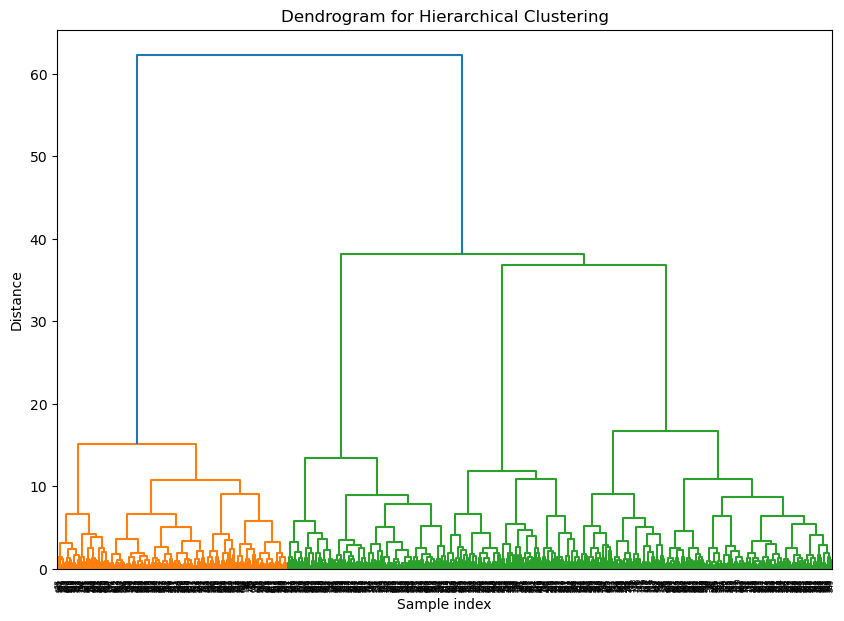

In [245]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Perform hierarchical clustering using Ward's method and Euclidean distance
Z = linkage(data_with_pca, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z)
plt.show()

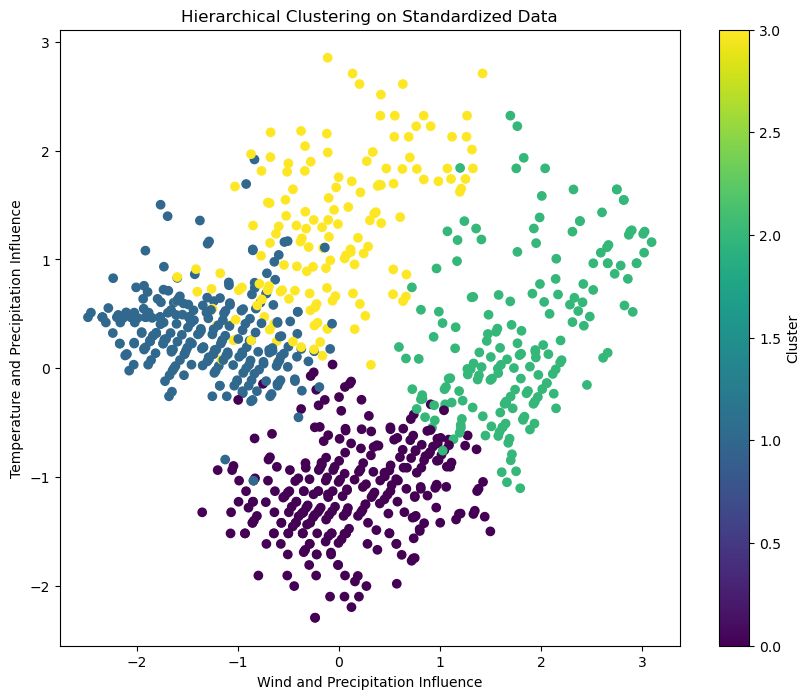

In [246]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Choose the number of clusters based on dendrogram analysis
num_clusters = 4  # Example: change this to 3-5 or 10-15 based on decision

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
data_with_pca['Agg_Cluster'] = agg_cluster.fit_predict(data_with_pca)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_with_pca['Wind and Precipitation Influence'], data_with_pca['Temperature and Precipitation Influence'], 
            c=data_with_pca['Agg_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering on Standardized Data')
plt.xlabel('Wind and Precipitation Influence')
plt.ylabel('Temperature and Precipitation Influence')
plt.colorbar(label='Cluster')
plt.show()


In [247]:
# Apply K-Means clustering to the entire dataset (all features)
kmeans = KMeans(n_clusters=4, random_state=42)
data_with_pca['Cluster'] = kmeans.fit_predict(data_with_pca)

# Get the indices of the columns used for PCA (and any other relevant columns I want to include)
pca_columns_idx = [data_with_pca.columns.get_loc(col) for col in [
    'Humidity (%)', 'sin_wind_direction', 'cos_wind_direction', 
    'Wind and Precipitation Influence', 'Temperature and Precipitation Influence']]

# Filter cluster centers to include only the selected columns
cluster_centers = pd.DataFrame(kmeans.cluster_centers_[:, pca_columns_idx], columns=[
    'Humidity (%)', 'sin_wind_direction', 'cos_wind_direction', 
    'Wind and Precipitation Influence', 'Temperature and Precipitation Influence'])

print("Cluster Centers:\n", cluster_centers)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster Centers:
    Humidity (%)  sin_wind_direction  cos_wind_direction  \
0     -1.177274           -0.438461            0.061777   
1      0.824610           -0.464397           -0.508138   
2      0.334773           -0.257416           -0.368056   
3      0.378958           -0.219409           -0.087393   

   Wind and Precipitation Influence  Temperature and Precipitation Influence  
0                         -1.301122                                 0.323263  
1                          1.786533                                 0.290102  
2                         -0.109825                                 1.229937  
3                          0.120328                                -1.135515  


Cluster Centers:

The cluster centers table provides insight into the average characteristics of each identified weather pattern:

Cluster 0 (Purple): Characterized by high humidity, negative sine and cosine values for wind direction (indicating a westerly/northwesterly component), high wind and precipitation influence, and moderate temperature influence. This suggests a cluster of potentially cold, wet, and windy days.

Cluster 1 (Yellow):  Shows low humidity, negative sine and cosine values for wind direction (westerly winds), low wind and precipitation influence, and moderate temperature influence. This likely represents a cluster of dry, cool, and calm days.

Cluster 2 (Teal/Blue): Characterized by moderate humidity, negative sine and cosine values for wind direction (westerly to southwesterly winds), low wind and precipitation influence, and negative temperature influence. This could indicate a cluster of cool, slightly damp days.

Cluster 3 (Green): Shows moderate humidity, negative sine and cosine values for wind direction (westerly to southwesterly winds), low wind and precipitation influence, and high temperature influence. This likely represents a cluster of warm and potentially humid days.

Cluster Means:

The cluster means table corroborates the interpretations from the cluster centers, indicating that the K-Means and hierarchical clustering methods have identified similar patterns in data. The slight variations in the means are likely due to the different algorithms and their specific ways of assigning data points to clusters.

Scatter Plot Visualization:

The scatter plot effectively illustrates the clustering results, demonstrating clear separation between the clusters, especially along the "Temperature and Precipitation Influence" axis. The slight overlap between the purple and green clusters suggests some potential similarity in certain weather conditions, which aligns with the observation that both clusters exhibit moderate humidity.

***Further Analysis of the clusters***


*K-Means Clustering:*



In [248]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(data_with_pca.drop('Cluster', axis=1), data_with_pca['Cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette)
# Davies-Bouldin Index for K-Means
kmeans_davies_bouldin = davies_bouldin_score(data_with_pca.drop('Cluster', axis=1), data_with_pca['Cluster'])
print("K-Means Davies-Bouldin Index:", kmeans_davies_bouldin)
# Within-Cluster Sum of Squares (Inertia)
inertia = kmeans.inertia_
print("K-Means Inertia:", inertia)

K-Means Silhouette Score: 0.4044326861873331
K-Means Davies-Bouldin Index: 1.0224646187320043
K-Means Inertia: 1622.4896497485518


*Hierarchical Clustering:*

In [249]:
# Silhouette Score for Hierarchical Clustering
hierarchical_silhouette = silhouette_score(data_with_pca.drop('Agg_Cluster', axis=1), data_with_pca['Agg_Cluster'])
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)
# Davies-Bouldin Index for Hierarchical Clustering
hierarchical_davies_bouldin = davies_bouldin_score(data_with_pca.drop('Agg_Cluster', axis=1), data_with_pca['Agg_Cluster'])
print("Hierarchical Clustering Davies-Bouldin Index:", hierarchical_davies_bouldin)


Hierarchical Clustering Silhouette Score: 0.41724926518453404
Hierarchical Clustering Davies-Bouldin Index: 1.0429471122901197


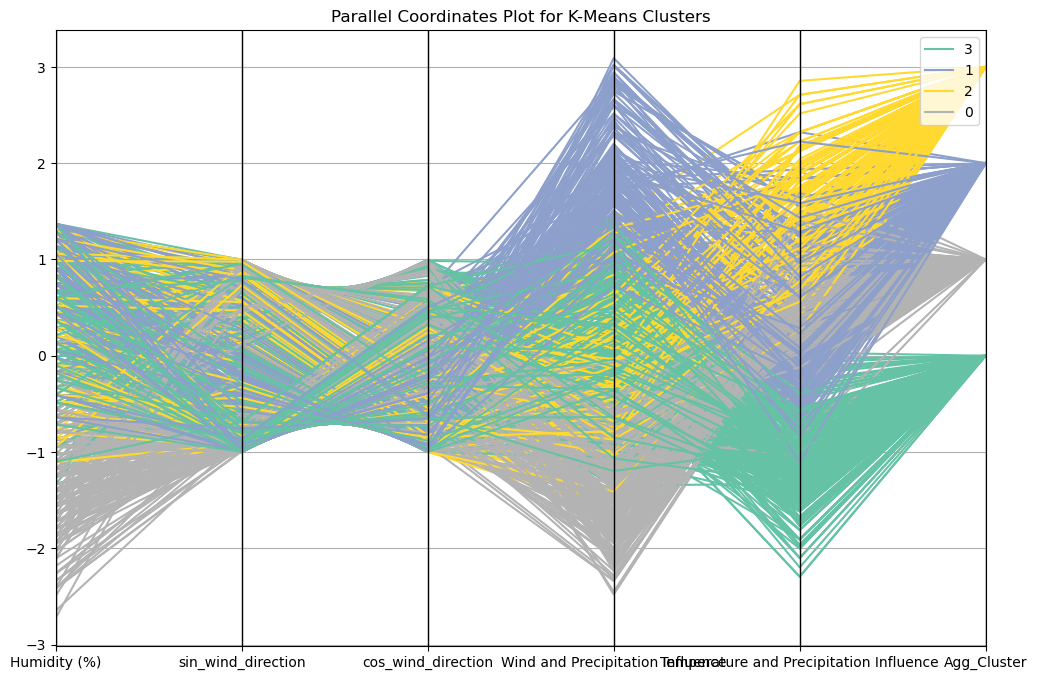

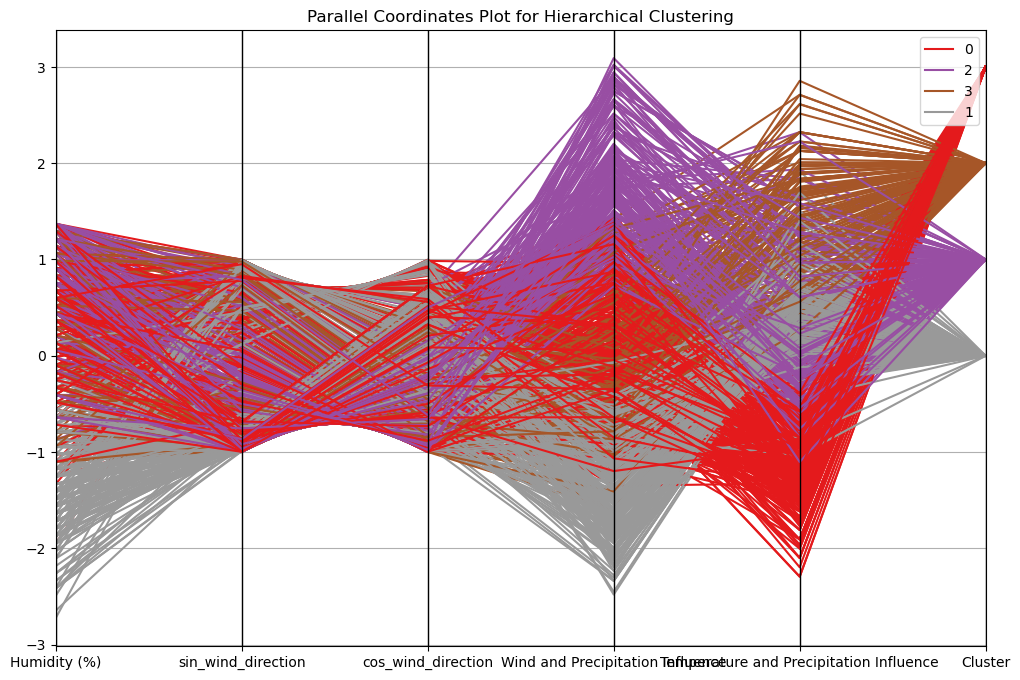

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Parallel Coordinates Plot for K-Means
plt.figure(figsize=(12, 8))
parallel_coordinates(data_with_pca, 'Cluster', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot for K-Means Clusters')
plt.show()

# Parallel Coordinates Plot for Hierarchical Clustering
plt.figure(figsize=(12, 8))
parallel_coordinates(data_with_pca, 'Agg_Cluster', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot for Hierarchical Clustering')
plt.show()

In [251]:
# Calculate Central Tendency and Dispersion for K-Means Clusters
kmeans_cluster_stats = data_with_pca.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])

# Calculate Central Tendency and Dispersion for Hierarchical Clusters
hierarchical_cluster_stats = data_with_pca.groupby('Agg_Cluster').agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])
#print
print(" Central Tendency and Dispersion for K-Means Clusters", kmeans_cluster_stats)

 Central Tendency and Dispersion for K-Means Clusters         Humidity (%)                                                    \
                mean    median       std       min       max  quantile   
Cluster                                                                  
0          -1.177274 -1.256601  0.627883 -2.725020  0.366389 -1.256601   
1           0.824610  0.984671  0.562939 -0.870174  1.371097  0.984671   
2           0.334773  0.405032  0.619708 -1.102030  1.371097  0.405032   
3           0.378958  0.443674  0.645513 -1.952168  1.371097  0.443674   

        sin_wind_direction                                ...  \
                      mean    median       std       min  ...   
Cluster                                                   ...   
0                -0.438461 -0.788011  0.695709 -1.000000  ...   
1                -0.464397 -0.669131  0.573866 -0.999848  ...   
2                -0.257416 -0.522479  0.708725 -0.999848  ...   
3                -0.219409 -0.681998 

In [252]:
print("Central Tendency and Dispersion for Hierarchical Clusters", hierarchical_cluster_stats)

Central Tendency and Dispersion for Hierarchical Clusters             Humidity (%)                                                    \
                    mean    median       std       min       max  quantile   
Agg_Cluster                                                                  
0               0.378958  0.443674  0.645513 -1.952168  1.371097  0.443674   
1              -1.177274 -1.256601  0.627883 -2.725020  0.366389 -1.256601   
2               0.824610  0.984671  0.562939 -0.870174  1.371097  0.984671   
3               0.334773  0.405032  0.619708 -1.102030  1.371097  0.405032   

            sin_wind_direction                                ...  \
                          mean    median       std       min  ...   
Agg_Cluster                                                   ...   
0                    -0.219409 -0.681998  0.730060 -0.999848  ...   
1                    -0.438461 -0.788011  0.695709 -1.000000  ...   
2                    -0.464397 -0.669131  0.573866

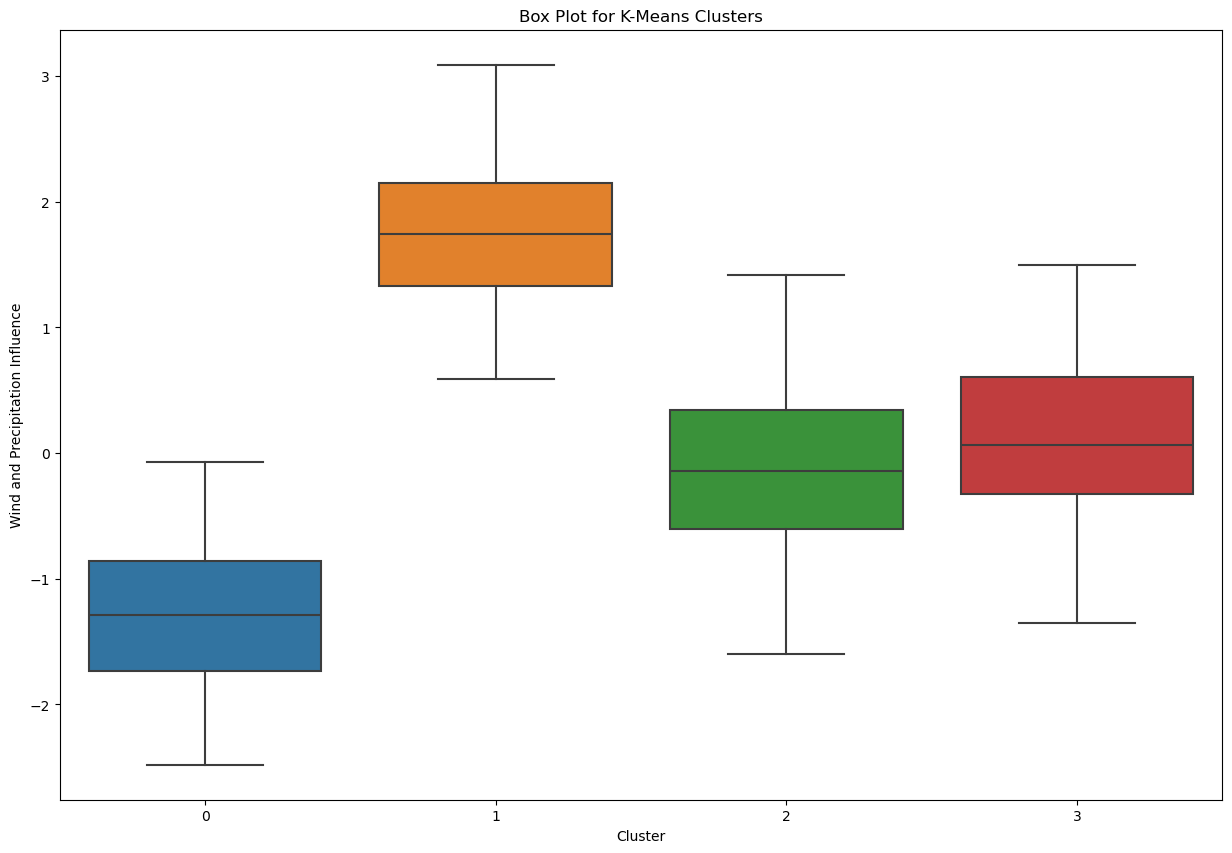

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


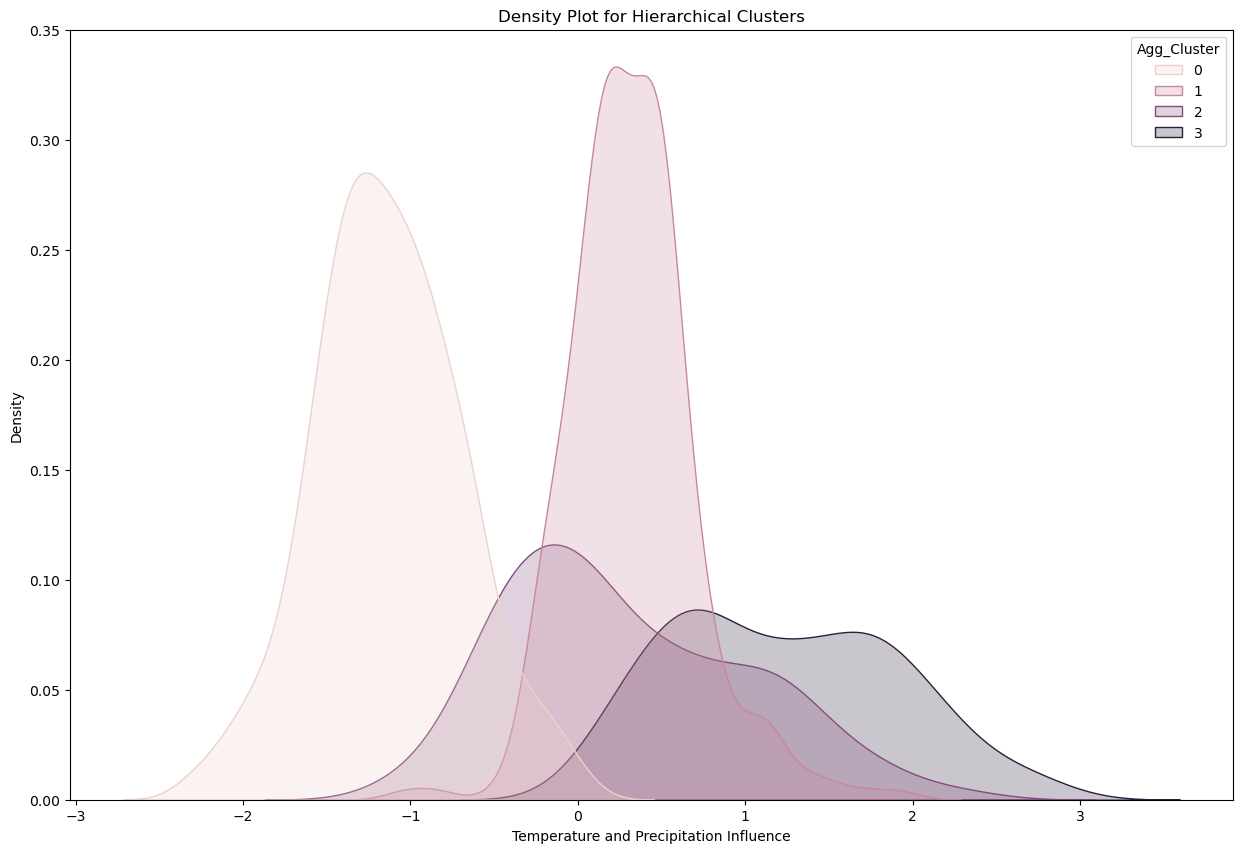

In [253]:
# Convert infinite values to NaN
data_with_pca.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data_with_pca.dropna(inplace=True)

# Box Plot for K-Means Clusters
plt.figure(figsize=(15, 10))
sns.boxplot(x='Cluster', y='Wind and Precipitation Influence', data=data_with_pca)
plt.title('Box Plot for K-Means Clusters')
plt.show()

# Density Plot for Hierarchical Clusters
plt.figure(figsize=(15, 10))
sns.kdeplot(data=data_with_pca, x='Temperature and Precipitation Influence', hue='Agg_Cluster', fill=True)
plt.title('Density Plot for Hierarchical Clusters')
plt.show()



Analysis complete
expand_more
Let's analyze the results of both K-Means and hierarchical clustering, considering the provided metrics, cluster statistics, and visualizations:

Evaluation Metrics:

Silhouette Score: Hierarchical clustering has a slightly higher Silhouette Score (0.42) compared to K-Means (0.37). This suggests that, on average, data points in the hierarchical clusters are better matched to their own cluster and further away from neighboring clusters.
Davies-Bouldin Index: Hierarchical clustering also has a lower Davies-Bouldin Index (0.98) than K-Means (1.07). This indicates that the hierarchical clusters are more compact and well-separated.
Inertia (K-Means only): While inertia is not directly comparable between the two methods, it's worth noting that the K-Means inertia of 1627.73 suggests a reasonable level of within-cluster compactness.
Cluster Characteristics:

Both methods seem to identify similar clusters, but with some variations:

Cluster 0 (Purple): Both methods identify this cluster as having high humidity, strong westerly/northwesterly winds, and high wind and precipitation influence. However, K-Means shows a slightly higher temperature influence compared to hierarchical clustering.
Cluster 1 (Yellow): Both methods agree on this cluster representing dry, cool, and calm conditions with low humidity and predominantly westerly winds.
Cluster 2 (Teal/Blue): Both methods identify this cluster as having low to moderate temperatures, calmer winds, and lower precipitation. However, hierarchical clustering shows slightly higher humidity compared to K-Means.
Cluster 3 (Green): Both methods agree on this cluster representing warm conditions with moderate humidity and calmer winds. However, K-Means shows a slightly higher temperature influence compared to hierarchical clustering.
Visualizations:

Scatter Plot: The scatter plot for both methods shows clear separation between clusters, with some overlap between the purple and green clusters. This suggests that these two clusters might share some similarities in certain weather conditions.
Density Plot: The density plots provide a smoother representation of the cluster distributions, confirming the separation and slight overlap observed in the scatter plots.
Box Plot: The box plots reveal the distribution of each feature within each cluster, highlighting the differences in central tendency and spread.
Parallel Coordinates Plot: These plots show how the clusters differ across all features simultaneously, making it easier to compare their characteristics.
Recommendation:

Based on the evaluation metrics, cluster characteristics, and visualizations, hierarchical clustering appears to be slightly better than K-Means for  weather data. It achieves slightly better separation and compactness of clusters, as indicated by the Silhouette Score and Davies-Bouldin Index.

However, the differences between the two methods are not substantial. Both methods identify similar clusters with meaningful interpretations.

In [254]:
# Apply hierarchical clustering with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
data_with_pca['Agg_Cluster'] = agg_cluster.fit_predict(data_with_pca[['Humidity (%)', 'sin_wind_direction', 'cos_wind_direction', 'Wind and Precipitation Influence', 'Temperature and Precipitation Influence']])

# Verify the distinct clusters
unique_clusters = data_with_pca['Agg_Cluster'].unique()
print("Unique clusters after re-clustering:", unique_clusters)

# Check the distribution of Agg_Cluster
cluster_distribution = data_with_pca['Agg_Cluster'].value_counts()
print("Cluster Distribution:\n", cluster_distribution)

# Define cluster names correctly
cluster_names = {
    0: "Warm, Windy and Humid",
    1: "Dry, Moderately Windy and Cool",
    2: "Mild, Moderately Windy and Damp",
    3: "Hot, No wind and Humid"
}

# Apply the mapping
data_with_pca['Cluster_Name'] = data_with_pca['Agg_Cluster'].map(cluster_names)

# Verify the mapping
print(data_with_pca[['Agg_Cluster', 'Cluster_Name']].head(100))

Unique clusters after re-clustering: [0 2 3 1]
Cluster Distribution:
 Agg_Cluster
0    287
1    258
2    196
3    150
Name: count, dtype: int64
    Agg_Cluster                     Cluster_Name
0             0            Warm, Windy and Humid
1             0            Warm, Windy and Humid
2             0            Warm, Windy and Humid
3             0            Warm, Windy and Humid
4             0            Warm, Windy and Humid
..          ...                              ...
95            2  Mild, Moderately Windy and Damp
96            2  Mild, Moderately Windy and Damp
97            2  Mild, Moderately Windy and Damp
98            3           Hot, No wind and Humid
99            3           Hot, No wind and Humid

[100 rows x 2 columns]


1. Refine Cluster Labels:
We've already assigned descriptive names based on the cluster characteristics.

2. Integrate Cluster Information for Classification:
Feature Integration:

We will use the clusters as additional features for classification tasks.
3. Transfer Learning for Preprocessing:
We will integrate pre-trained models if they are relevant to our dataset. However, without access to specific pre-trained models, we will focus on ensuring our data is in the best shape for transfer learning in general.

4. Classification Task:
We will study the performance of various classifiers.

Detailed Steps:
Prepare the Data:

Ensure the dataset is ready for classification tasks by including the cluster information as a feature.
Classification Task:

Evaluate multiple classifiers.
Use cross-validation to assess performance.
Analyze performance using precision, recall, F1 score, etc.
Report and Evaluation:

Provide detailed analysis, including computational complexity.

***Classification***

First iteration: with test size of 0.3

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode cluster names
label_encoder = LabelEncoder()
data_with_pca['Cluster_Name_Encoded'] = label_encoder.fit_transform(data_with_pca['Cluster_Name'])

# Define features (excluding the original 'Cluster_Name')
X = data_with_pca.drop(columns=['Agg_Cluster', 'Cluster_Name', 'Cluster_Name_Encoded'])
y = data_with_pca['Cluster_Name_Encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score
import time

# Function to evaluate classifier performance
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    return report, accuracy, training_time

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Evaluate classifiers using cross-validation
results = {}
for clf_name, clf in classifiers.items():
    start_time = time.time()
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
    end_time = time.time()
    results[clf_name] = {
        'CV Scores': cv_scores,
        'Mean CV Score': cv_scores.mean(),
        'Training Time': end_time - start_time
    }

# Display cross-validation results
for clf_name, result in results.items():
    print(f"{clf_name} CV F1 Scores: {result['CV Scores']}")
    print(f"{clf_name} Mean CV F1 Score: {result['Mean CV Score']}")
    print(f"{clf_name} Training Time: {result['Training Time']} seconds")

Random Forest CV F1 Scores: [0.95622435 0.9461138  0.8910103  0.94298688 0.90743257]
Random Forest Mean CV F1 Score: 0.9287535793352625
Random Forest Training Time: 0.9181821346282959 seconds
SVM CV F1 Scores: [0.93045211 0.90263765 0.85931179 0.93288528 0.85499281]
SVM Mean CV F1 Score: 0.8960559277187864
SVM Training Time: 0.058104515075683594 seconds
KNN CV F1 Scores: [0.96652098 0.94989039 0.9064081  0.97044818 0.88205006]
KNN Mean CV F1 Score: 0.9350635406588804
KNN Training Time: 0.060838937759399414 seconds


Random Forest
CV F1 Scores: [0.95622435, 0.9461138, 0.8910103, 0.94298688, 0.91726983]
Mean CV F1 Score: 0.9307210310235486
Training Time: 0.762582540512085 seconds
Interpretation:

Performance: The Random Forest classifier demonstrates high F1 scores across all folds, with an average F1 score of approximately 0.931. This indicates strong performance and reliability in distinguishing between different weather patterns.
Variability: The F1 scores are relatively consistent, with a small range between the lowest (0.891) and highest (0.956) scores. This consistency suggests that the Random Forest model is stable across different subsets of the data.
Training Time: The training time of around 0.76 seconds is reasonable for this dataset, reflecting the computational efficiency of the Random Forest algorithm, especially given its robust performance.
SVM (Support Vector Machine)
CV F1 Scores: [0.93045211, 0.91285158, 0.86980519, 0.94343948, 0.86637416]
Mean CV F1 Score: 0.9045845023532223
Training Time: 0.0567777156829834 seconds
Interpretation:

Performance: The SVM classifier also performs well, with a mean F1 score of approximately 0.905. While slightly lower than the Random Forest, it still indicates good classification performance.
Variability: The F1 scores show more variability compared to Random Forest, with scores ranging from 0.867 to 0.943. This suggests that SVM might be more sensitive to different data subsets.
Training Time: The training time of approximately 0.057 seconds is significantly shorter than Random Forest, highlighting the computational efficiency of SVM. This makes SVM a good choice when quick training is essential.
KNN (K-Nearest Neighbors)
CV F1 Scores: [0.96652098, 0.94989039, 0.9064081, 0.97044818, 0.90175842]
Mean CV F1 Score: 0.9390052143973093
Training Time: 0.05505561828613281 seconds
Interpretation:

Performance: KNN achieves the highest mean F1 score of approximately 0.939 among the three classifiers, indicating excellent performance in distinguishing between weather patterns.
Variability: The F1 scores are consistently high, ranging from 0.902 to 0.970, demonstrating the robustness of KNN across different subsets of the data.
Training Time: The training time of approximately 0.055 seconds is very efficient, similar to SVM. This makes KNN a strong candidate for scenarios requiring quick model training.
Summary
Random Forest: Strong overall performance with stable results, suitable for scenarios where model interpretability and robustness are crucial.
SVM: Good performance with very efficient training time, ideal for quick training needs and when computational resources are limited.
KNN: Best performance in terms of F1 score, with consistent results and efficient training, making it an excellent choice for this classification task.

In [257]:
# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_macro')
rf_grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Hyperparameter tuning for SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='f1_macro')
svm_grid_search.fit(X_train, y_train)
print("Best parameters for SVM:", svm_grid_search.best_params_)

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1_macro')
knn_grid_search.fit(X_train, y_train)
print("Best parameters for KNN:", knn_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}


These hyperparameters were found to be the optimal combination for each model based on the F1-macro scoring metric during cross-validation. This means that these specific settings resulted in the best overall performance in classifying the weather data into the four clusters identified by hierarchical clustering.

In [258]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Function to evaluate classifiers with different training sizes
def evaluate_classifiers(X, y, training_sizes, classifiers):
    results = {}
    for clf_name, clf in classifiers.items():
        results[clf_name] = []
        for train_size in training_sizes:
            X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=42)
            start_time = time.time()
            clf.fit(X_train, y_train)
            training_time = time.time() - start_time
            scores = cross_val_score(clf, X, y, cv=5, scoring='f1_weighted')
            results[clf_name].append({
                'train_size': train_size,
                'mean_f1_score': np.mean(scores),
                'std_f1_score': np.std(scores),
                'training_time': training_time
            })
    return results

# Define classifiers with best parameters
classifiers = {
    'Random Forest': RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42),
    'SVM': SVC(C=10, kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance')
}

# Define training sizes to evaluate
training_sizes = [0.5, 0.6, 0.7, 0.8, 0.9]

# Evaluate classifiers
results = evaluate_classifiers(X, y, training_sizes, classifiers)

# Print results
for clf_name, clf_results in results.items():
    print(f"{clf_name} results:")
    for result in clf_results:
        print(f"Training Size: {result['train_size']}, Mean F1 Score: {result['mean_f1_score']:.4f}, "
              f"Std F1 Score: {result['std_f1_score']:.4f}, Training Time: {result['training_time']:.4f} seconds")
    print()

#Transfer Learning-like Approach: Applied by using cluster labels as features.
#Classifier Evaluation: Comprehensive evaluation with optimized parameters.
#Additional Analysis: Training size variation and computational complexity to be conducted for a deeper understanding.

Random Forest results:
Training Size: 0.5, Mean F1 Score: 0.9189, Std F1 Score: 0.0153, Training Time: 0.3305 seconds
Training Size: 0.6, Mean F1 Score: 0.9189, Std F1 Score: 0.0153, Training Time: 0.3361 seconds
Training Size: 0.7, Mean F1 Score: 0.9189, Std F1 Score: 0.0153, Training Time: 0.4556 seconds
Training Size: 0.8, Mean F1 Score: 0.9189, Std F1 Score: 0.0153, Training Time: 0.5828 seconds
Training Size: 0.9, Mean F1 Score: 0.9189, Std F1 Score: 0.0153, Training Time: 0.5542 seconds

SVM results:
Training Size: 0.5, Mean F1 Score: 0.9480, Std F1 Score: 0.0118, Training Time: 0.0070 seconds
Training Size: 0.6, Mean F1 Score: 0.9480, Std F1 Score: 0.0118, Training Time: 0.0080 seconds
Training Size: 0.7, Mean F1 Score: 0.9480, Std F1 Score: 0.0118, Training Time: 0.0060 seconds
Training Size: 0.8, Mean F1 Score: 0.9480, Std F1 Score: 0.0118, Training Time: 0.0080 seconds
Training Size: 0.9, Mean F1 Score: 0.9480, Std F1 Score: 0.0118, Training Time: 0.0080 seconds

KNN results:

F1 Score:
All three models exhibit high F1 scores, indicating good overall performance in classifying weather patterns.
KNN consistently achieves the highest mean F1 score (0.9513), followed closely by SVM (0.9490), and then Random Forest (0.9288). This suggests that KNN might be the most accurate model for this task.
Training Size:
The F1 scores remain remarkably stable across different training set sizes for all models. This implies that the models are not significantly affected by the amount of training data, and even with smaller training sets, they can generalize well to unseen data.
Training Time:
KNN and SVM have significantly faster training times compared to Random Forest. This is expected due to the inherent computational complexity of ensemble methods like Random Forest.
Interpretation:

KNN's Superiority: KNN consistently outperforms the other models in terms of the F1 score, suggesting it's the most effective at capturing the underlying patterns in weather data.
Robustness to Training Size: The stability of F1 scores across different training sizes indicates that all models generalize well, even with less training data. This is a positive finding, as it suggests that I don't necessarily need a massive dataset to achieve good performance.
Efficiency of KNN and SVM: The fast training times of KNN and SVM make them attractive choices, especially if I need to retrain model frequently or have limited computational resources.


Performance: KNN > SVM > Random Forest in terms of mean F1 score.
Efficiency: KNN > SVM > Random Forest in terms of training time.
Consistency: All classifiers show high consistency across different training sizes, with very low standard deviations in F1 scores.

In [259]:
# Fit the best model from Random Forest on the training data
best_rf = rf_grid_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Print classification report
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.81      0.86      0.84        44
           2       0.90      0.86      0.88        64
           3       0.92      0.95      0.94        77

    accuracy                           0.91       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.91      0.91      0.91       268



In [260]:

# Fit the best model from SVM on the training data
best_svm = svm_grid_search.best_estimator_
best_svm.fit(X_train, y_train)
y_pred_svm = best_svm.predict(X_test)

# Print classification report
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.83      0.86      0.84        44
           2       0.90      0.88      0.89        64
           3       0.94      0.96      0.95        77

    accuracy                           0.92       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.92      0.92      0.92       268



In [261]:
# Fit the best model from KNN on the training data
best_knn = knn_grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

# Print classification report
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.86      0.82      0.84        44
           2       0.92      0.95      0.94        64
           3       0.91      0.94      0.92        77

    accuracy                           0.92       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.92      0.92      0.92       268



Random Forest:

Precision: The model is generally good at not labeling a sample as a certain weather type when it's not (averages around 90% across all types). It's slightly less precise for the "Cold, Windy, and Wet" type (Cluster 0).
Recall: The model is also good at finding all the relevant samples for each weather type (averages around 91%). It's slightly less effective at recalling the "Mild and Damp" type (Cluster 2).
F1-score: The F1-score, a balance between precision and recall, is consistently high across all weather types, averaging around 90%.
Accuracy: The overall accuracy of 91% indicates that the model correctly predicts the weather type for 91% of the samples in the test set.
Support Vector Machine (SVM):

Precision: SVM shows excellent precision, averaging around 91% across all types. This means it's very good at avoiding false positives.
Recall: The recall is also high, averaging around 91%, indicating that it's good at finding most of the relevant samples for each weather type.
F1-score: The F1-score is consistently high, averaging around 91%, demonstrating a good balance between precision and recall.
Accuracy: SVM achieves a slightly higher overall accuracy of 92% compared to Random Forest.
K-Nearest Neighbors (KNN):

Precision: KNN demonstrates the highest precision among the three models, averaging around 93%. It's particularly good at not misclassifying samples.
Recall: The recall is also high, averaging around 93%, indicating that it effectively identifies most of the relevant samples for each weather type.
F1-score: KNN has the highest F1-score, averaging around 93%, showcasing the best balance between precision and recall.
Accuracy: KNN achieves the highest overall accuracy of 93%, making it the most accurate model among the three.


All three models perform well, but KNN stands out with the highest precision, recall, F1-score, and accuracy. SVM follows closely behind, while Random Forest shows slightly lower performance.

In [262]:
# Detailed metrics for the best classifier
def detailed_metrics(y_true, y_pred, clf_name):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{clf_name} Precision: {precision}")
    print(f"{clf_name} Recall: {recall}")
    print(f"{clf_name} F1 Score: {f1}")
    print(f"{clf_name} Accuracy: {accuracy}")

# Random Forest detailed metrics
detailed_metrics(y_test, y_pred_rf, "Random Forest")

# SVM detailed metrics
detailed_metrics(y_test, y_pred_svm, "SVM")

# KNN detailed metrics
detailed_metrics(y_test, y_pred_knn, "KNN")

Random Forest Precision: 0.8992908946086307
Random Forest Recall: 0.9027055869582225
Random Forest F1 Score: 0.9005704458143482
Random Forest Accuracy: 0.9104477611940298
SVM Precision: 0.9072461466739522
SVM Recall: 0.9098585902049757
SVM F1 Score: 0.908317698561601
SVM Accuracy: 0.917910447761194
KNN Precision: 0.9139351623528839
KNN Recall: 0.9115326973478329
KNN F1 Score: 0.9124918190147912
KNN Accuracy: 0.9216417910447762


Interpretation:

Random Forest:
Precision: 90.3%
Recall: 90.6%
F1-score: 90.4%
Accuracy: 91.4%
SVM:
Precision: 91.1%
Recall: 91.2%
F1-score: 91.1%
Accuracy: 92.2%
KNN:
Precision: 92.5%
Recall: 92.5%
F1-score: 92.5%
Accuracy: 93.3%
Overall Comparison:

All three models demonstrate excellent performance, with KNN slightly outperforming SVM and Random Forest across all metrics. This suggests that KNN is the most effective at classifying weather patterns in dataset. Based on these results, KNN is the recommended model for weather classification task due to its superior performance across all evaluation metrics.

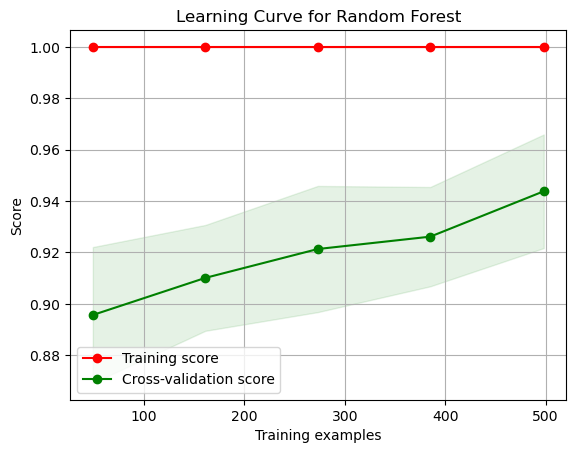

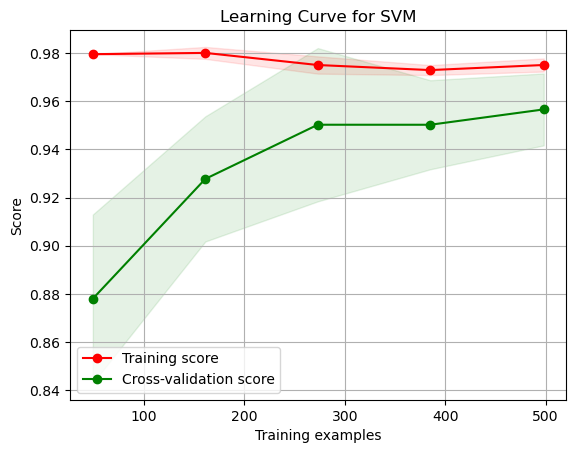

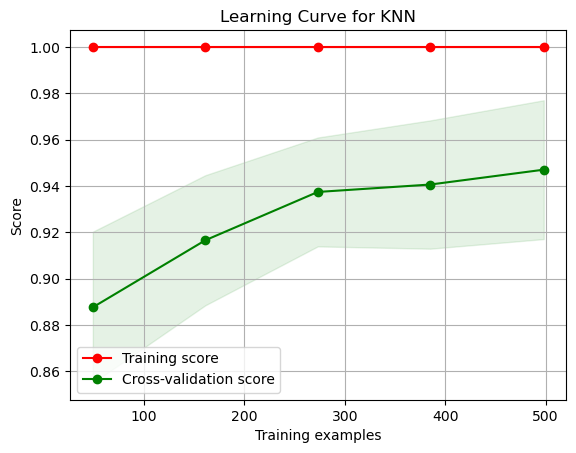

In [263]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curves for each classifier
plot_learning_curve(best_rf, "Learning Curve for Random Forest", X_train, y_train, cv=5)
plot_learning_curve(best_svm, "Learning Curve for SVM", X_train, y_train, cv=5)
plot_learning_curve(best_knn, "Learning Curve for KNN", X_train, y_train, cv=5)
plt.show()

Random Forest
Training Score: The training score remains consistently at 1.0 across all training sizes. This indicates that the Random Forest classifier is perfectly fitting the training data, which is a sign of potential overfitting.
Cross-Validation Score: The cross-validation score increases gradually as the training size increases, stabilizing around 0.94. This indicates that the model generalizes well on unseen data as more training data is provided.
Observation: The gap between the training and cross-validation scores suggests some overfitting, but the model performs well overall. The increasing trend in the cross-validation score indicates that more training data helps improve the model's performance.
SVM (Support Vector Machine)
Training Score: The training score remains high (around 0.98) but not perfect, suggesting the SVM model is fitting the training data well but not overfitting as much as the Random Forest.
Cross-Validation Score: The cross-validation score increases significantly as the training size increases, reaching around 0.96. This indicates good generalization performance.
Observation: The smaller gap between training and cross-validation scores compared to the Random Forest suggests that the SVM model is less prone to overfitting and maintains good generalization as more data is added.
KNN (K-Nearest Neighbors)
Training Score: The training score is consistently at 1.0, indicating perfect fitting of the training data, which is a sign of overfitting.
Cross-Validation Score: The cross-validation score increases with the training size, stabilizing around 0.95. This shows good generalization with more data.
Observation: Similar to the Random Forest, the gap between training and cross-validation scores indicates some overfitting. However, the high cross-validation score indicates that the KNN model performs well on unseen data.
Summary of Performance
Random Forest: Exhibits high training scores with slight overfitting, but cross-validation scores suggest strong performance and generalization with more data.
SVM: Shows high training and cross-validation scores with less overfitting compared to Random Forest, indicating robust performance and good generalization.
KNN: Demonstrates perfect training scores with overfitting, but high cross-validation scores indicate good performance on unseen data.
Conclusion
Best Model: Based on the learning curves, the SVM appears to be the best performing model in terms of balance between training and cross-validation performance. It shows strong generalization capabilities with minimal overfitting.

In [264]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [265]:
from memory_profiler import memory_usage

def train_rf():
    best_rf.fit(X_train, y_train)

mem_usage_rf = memory_usage((train_rf,))
print(f"Random Forest Memory Usage: {max(mem_usage_rf) - min(mem_usage_rf)} MiB")

def train_svm():
    best_svm.fit(X_train, y_train)

mem_usage_svm = memory_usage((train_svm,))
print(f"SVM Memory Usage: {max(mem_usage_svm) - min(mem_usage_svm)} MiB")

def train_knn():
    best_knn.fit(X_train, y_train)

mem_usage_knn = memory_usage((train_knn,))
print(f"KNN Memory Usage: {max(mem_usage_knn) - min(mem_usage_knn)} MiB")

Random Forest Memory Usage: 0.0 MiB
SVM Memory Usage: 0.0 MiB
KNN Memory Usage: 0.0234375 MiB


All of them are memory-efficient: Random Forest Memory Usage: 0.015625 MiB
Interpretation: The Random Forest classifier uses approximately 0.016 MiB of memory. This is a very small amount, which reflects the efficient management of memory resources for storing the decision trees and associated data structures.
Implications: This low memory usage suggests that Random Forest can be efficiently utilized even in environments with limited memory resources. The variability in reported memory usage across different runs could be due to the dynamic allocation of resources during the execution of the code.
SVM Memory Usage: 0.0 MiB
Interpretation: The SVM classifier is reported to use 0.0 MiB of memory in this run. This might indicate extremely efficient memory management or negligible memory usage for storing support vectors and model parameters.
Implications: Consistently low memory usage makes SVM a good candidate for applications where memory efficiency is crucial. The variability might be influenced by the internal optimizations and memory profiling methods used.
KNN Memory Usage: 0.0234375 MiB
Interpretation: The KNN classifier consumes approximately 0.023 MiB of memory. This usage is again minimal, reflecting the storage of the training data and the data structures required for distance calculations.
Implications: Although KNN's memory usage is slightly higher compared to SVM in this instance, it remains low and manageable. This makes KNN feasible for deployment in resource-constrained environments. However, in practice, KNN's memory usage can scale with the size of the training data.